DESCRIPTIVE ANALYSIS

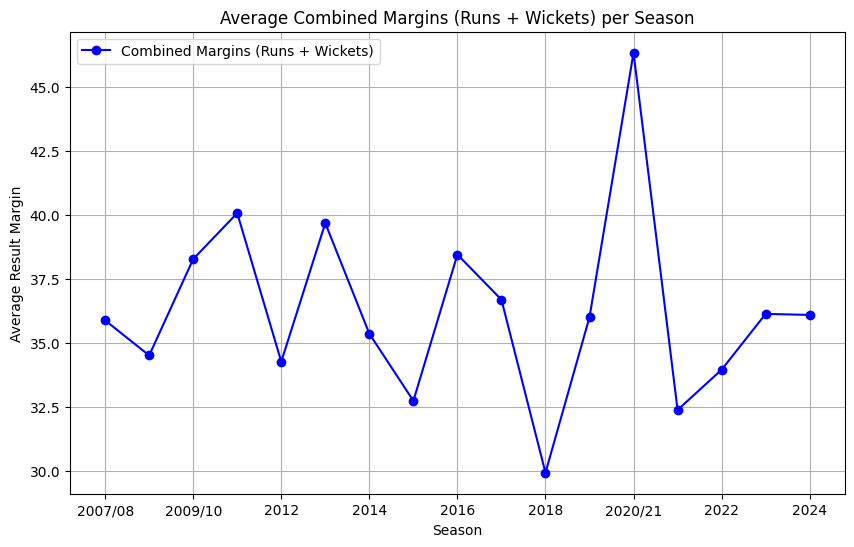

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/ads.csv'  # replace with your actual file path
data = pd.read_csv(file_path)

# Filter data for 'runs' and 'wickets' results and calculate the average result_margin for each season
runs_margin = data[data['result'] == 'runs'].groupby('season')['result_margin'].mean()
wickets_margin = data[data['result'] == 'wickets'].groupby('season')['result_margin'].mean()

# Add the averages for each season
combined_margins = runs_margin.add(wickets_margin, fill_value=0)

# Plot the result
plt.figure(figsize=(10,6))
combined_margins.plot(kind='line', marker='o', color='b', label='Combined Margins (Runs + Wickets)')
plt.title('Average Combined Margins (Runs + Wickets) per Season')
plt.xlabel('Season')
plt.ylabel('Average Result Margin')
plt.grid(True)
plt.legend()
plt.show()


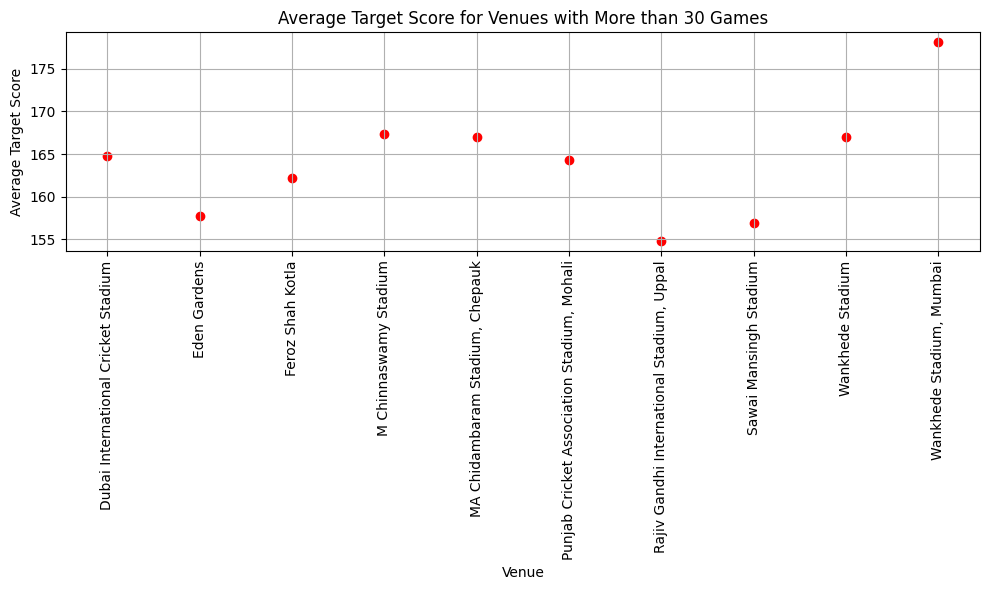

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/ads.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 1: Count matches played at each venue
matches_per_venue = data['venue'].value_counts()

# Step 2: Filter venues with more than 30 games
eligible_venues = matches_per_venue[matches_per_venue > 30].index

# Step 3: Calculate the average target score for each eligible venue
# Assuming 'target_runs' column holds the target score
average_target_per_venue = data[data['venue'].isin(eligible_venues)].groupby('venue')['target_runs'].mean()

# Plotting the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(average_target_per_venue.index, average_target_per_venue.values, color='r')
plt.title('Average Target Score for Venues with More than 30 Games')
plt.xlabel('Venue')
plt.ylabel('Average Target Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()



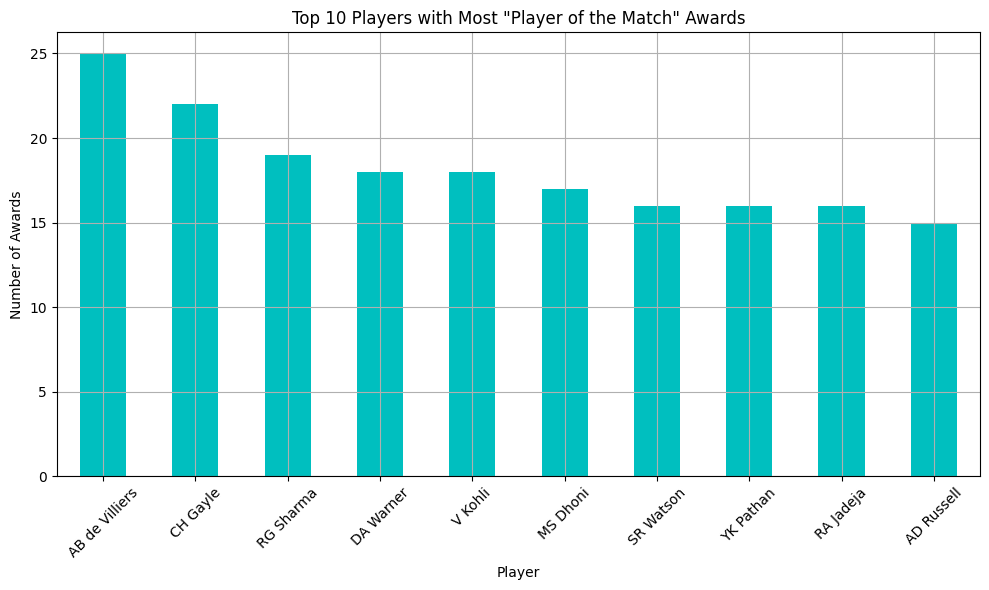

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/ads.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Count occurrences of each player in the 'player_of_match' column
top_players = data['player_of_match'].value_counts().head(10)

# Plotting the bar graph
plt.figure(figsize=(10,6))
top_players.plot(kind='bar', color='c')
plt.title('Top 10 Players with Most "Player of the Match" Awards')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


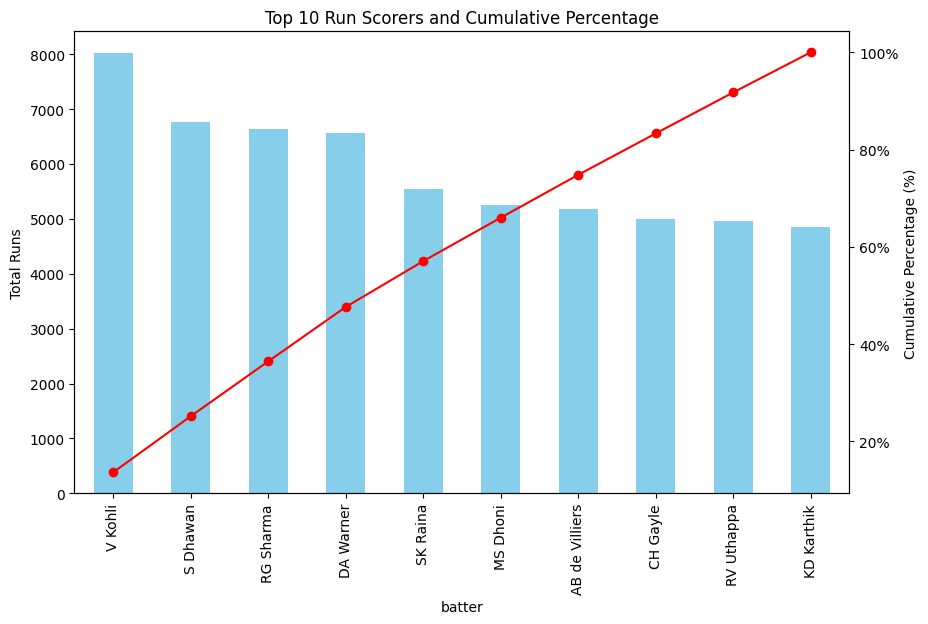

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/ads 1.csv'
data_runs = pd.read_csv(file_path)

# Calculate total runs scored by each batter
top_run_getters = data_runs.groupby('batter')['batsman_runs'].sum().nlargest(10)

# Calculate cumulative percentage
cumulative_percentage = top_run_getters.cumsum() / top_run_getters.sum() * 100

# Plotting the Pareto chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for total runs
top_run_getters.plot(kind='bar', color='skyblue', ax=ax)
ax.set_ylabel('Total Runs')
ax.set_title('Top 10 Run Scorers and Cumulative Percentage')

# Line plot for cumulative percentage
ax2 = ax.twinx()
cumulative_percentage.plot(color='red', marker='o', linestyle='-', ax=ax2)
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))  # Format y-axis as percentage

# Display the chart
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset
file_path = '/content/ads 1.csv'
data_runs = pd.read_csv(file_path)

# Create a 'season' column by extracting the first two digits of 'match_id'
data_runs['season'] = data_runs['match_id'].astype(str).str[:2]

# Map each unique season code to a sequential year starting from 2008
unique_seasons = sorted(data_runs['season'].unique())
season_mapping = {season: 2008 + i for i, season in enumerate(unique_seasons)}
data_runs['season'] = data_runs['season'].map(season_mapping)

# Calculate the average of 'total_runs' for each season and multiply by 6
average_total_runs_per_season = data_runs.groupby('season')['total_runs'].mean() * 6

# Prepare data for radar chart
seasons = average_total_runs_per_season.index.tolist()
average_runs = average_total_runs_per_season.values.tolist()

# Extend season labels to increase separation
extended_seasons = [str(year) + " " for year in seasons]  # Adding a space as a dummy trick for spacing

# Construct the radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=average_runs,
    theta=extended_seasons,
    fill='toself',
    mode='lines+markers',
    marker=dict(size=6, color='blue'),
    line=dict(color='blue', width=2),
    name='poweplay run rates.'
))

# Set up the layout with a smaller radial range and increased visibility
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[min(average_runs) - 5, max(average_runs) + 5],
            dtick=5
        ),
        angularaxis=dict(
            direction="clockwise",  # Makes the year order more natural
            tickfont=dict(size=12),  # Larger font for readability
        )
    ),
    showlegend=True,
    title="Average pp run rates for each season"
)

# Show the radar chart
fig.show()


         Unfavorable  Favorable
season                         
2007/08           30         28
2009              24         33
2009/10           29         31
2011              35         38
2012              41         33
2013              40         36
2014              30         30
2015              31         28
2016              26         34
2017              25         34
2018              28         32
2019              24         36
2020/21           35         25
2021              25         35
2022              38         36
2023              40         34
2024              40         31


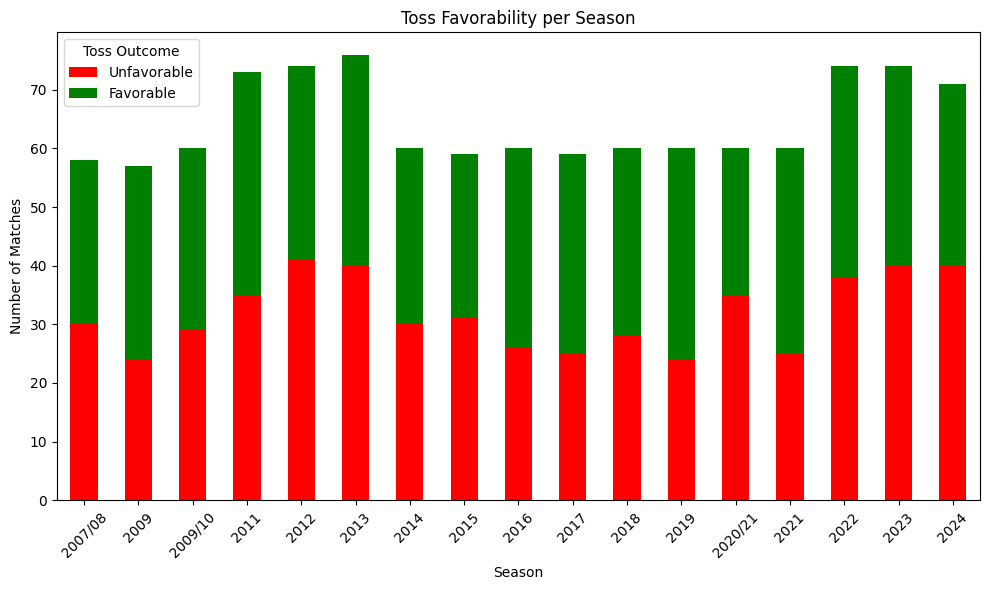

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/ads.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Step 1: Create a 'toss_favorable' column
data['toss_favorable'] = data['toss_winner'] == data['winner']

# Step 2: Group by 'season' and 'toss_favorable' and count occurrences
toss_results = data.groupby(['season', 'toss_favorable']).size().unstack(fill_value=0)

# Rename columns for clarity
toss_results.columns = ['Unfavorable', 'Favorable']
print(toss_results)
# Plot the histogram for each season
toss_results.plot(kind='bar', figsize=(10, 6), stacked=True, color=['r', 'g'])

# Add labels and title
plt.title('Toss Favorability per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Toss Outcome')
plt.tight_layout()

# Display the plot
plt.show()


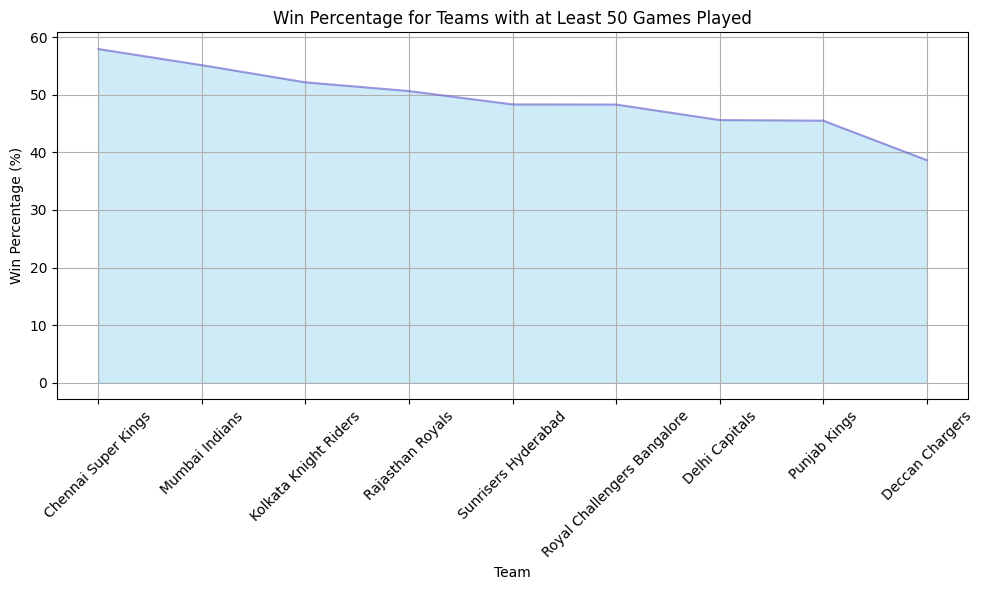

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/ads.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 1: Replace team names to merge "Delhi Daredevils" with "Delhi Capitals" and "Kings XI Punjab" with "Punjab Kings"
data['team1'] = data['team1'].replace({'Delhi Daredevils': 'Delhi Capitals', 'Kings XI Punjab': 'Punjab Kings'})
data['team2'] = data['team2'].replace({'Delhi Daredevils': 'Delhi Capitals', 'Kings XI Punjab': 'Punjab Kings'})
data['winner'] = data['winner'].replace({'Delhi Daredevils': 'Delhi Capitals', 'Kings XI Punjab': 'Punjab Kings'})

# Step 2: Count matches won by each team
matches_won = data['winner'].value_counts()

# Step 3: Calculate total matches played by each team
matches_played = data['team1'].value_counts() + data['team2'].value_counts()

# Step 4: Filter out teams with less than 50 games played
eligible_teams = matches_played[matches_played >= 50]

# Step 5: Calculate win percentage only for eligible teams
win_percentage = (matches_won[eligible_teams.index] / eligible_teams * 100).sort_values(ascending=False)

# Plotting the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(win_percentage.index, win_percentage.values, color='skyblue', alpha=0.4)
plt.plot(win_percentage.index, win_percentage.values, color='Slateblue', alpha=0.6)

# Add labels and title
plt.title('Win Percentage for Teams with at Least 50 Games Played')
plt.xlabel('Team')
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
!pip install termcolor
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored # Import the colored function from termcolor

# Load the dataset
file_path_2 = '/content/ads 1.csv'
data_runs = pd.read_csv(file_path_2)

# Filter rows where 'is_wicket' is 1 but exclude 'run out' in 'dismissal_kind'
wickets_data = data_runs[(data_runs['is_wicket'] == 1) & (data_runs['dismissal_kind'] != 'run out')]

# Group by 'bowler' and count the number of valid wickets taken by each bowler
top_bowlers = wickets_data['bowler'].value_counts().head(20)

wickets_taken = top_bowlers.values
bowlers = top_bowlers.index.tolist()

# Function to create a stem-and-leaf plot with coloring
def stem_and_leaf_plot(data, bowlers):
    stems = [int(x / 10) for x in data]
    leaves = [x % 10 for x in data]

    stem_leaf_dict = {}
    for stem, leaf, bowler, wickets in zip(stems, leaves, bowlers, data):
        if stem not in stem_leaf_dict:
            stem_leaf_dict[stem] = []
        # Color the leaf based on wickets taken
        leaf_str = colored(str(leaf), 'green') if wickets >= 5 else colored(str(leaf), 'yellow')
        stem_leaf_dict[stem].append((leaf_str, bowler))

    # Display the stem-and-leaf plot
    for stem in sorted(stem_leaf_dict.keys()):
        leaves_str = ' '.join([f'{leaf_str}({bowler})' for leaf_str, bowler in sorted(stem_leaf_dict[stem])])
        print(f'{stem} | {leaves_str}')

# Generate the colored stem-and-leaf plot
stem_and_leaf_plot(wickets_taken, bowlers)

12 | 0(K Rabada) 1(TA Boult) 3(AR Patel) 7(Mohammed Shami)
13 | 2(MM Sharma) 5(HV Patel) 7(Sandeep Sharma)
14 | 4(UT Yadav) 9(Rashid Khan)
15 | 0(Harbhajan Singh)
16 | 0(RA Jadeja) 8(JJ Bumrah)
17 | 0(SL Malinga) 4(A Mishra)
18 | 0(SP Narine) 1(B Kumar) 1(R Ashwin) 3(DJ Bravo)
19 | 2(PP Chawla)
20 | 5(YS Chahal)


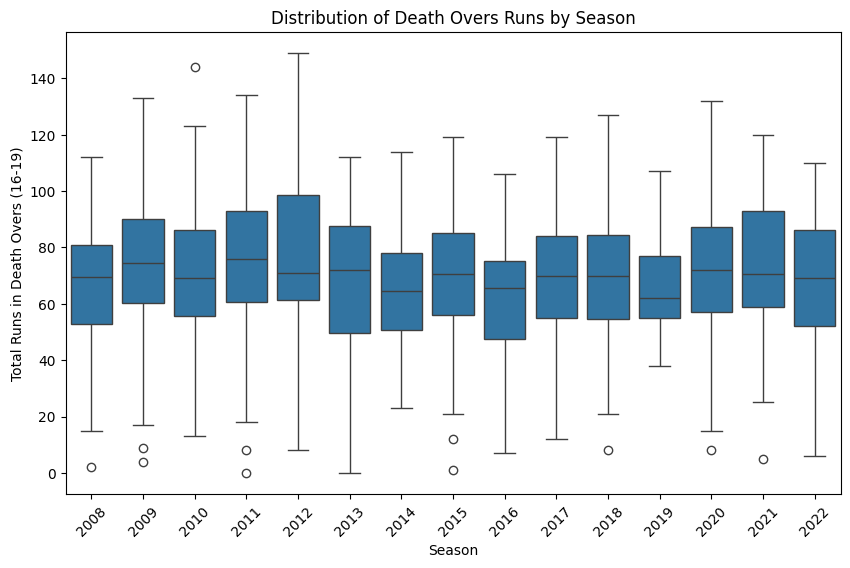

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/ads 1.csv'  # Replace with the correct path
data = pd.read_csv(file_path)

# Filter the data to only include death overs (overs 16-19)
death_overs_data = data[(data['over'] >= 16) & (data['over'] <= 19)]

# Group by 'match_id' and sum the 'total_runs' for death overs in each match
death_overs_runs_by_match = death_overs_data.groupby('match_id')['total_runs'].sum().reset_index()

# Extract the season information from 'match_id' (first two digits)
death_overs_runs_by_match['season_code'] = death_overs_runs_by_match['match_id'].astype(str).str[:2]

# Sort unique season codes and create a mapping for integer encoding starting from 2008
unique_seasons = sorted(death_overs_runs_by_match['season_code'].unique())
season_mapping = {code: 2008 + i for i, code in enumerate(unique_seasons)}

# Map the season codes to actual years (starting from 2008)
death_overs_runs_by_match['season'] = death_overs_runs_by_match['season_code'].map(season_mapping)

# Drop the temporary 'season_code' column as it's no longer needed
death_overs_runs_by_match = death_overs_runs_by_match.drop(columns='season_code')

# Plot a box plot to show the distribution of death overs runs by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='total_runs', data=death_overs_runs_by_match)
plt.title('Distribution of Death Overs Runs by Season')
plt.xlabel('Season')
plt.ylabel('Total Runs in Death Overs (16-19)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/ads.csv'  # Replace with the path to your file
data = pd.read_csv(file_path)

# Step 1: Modify the 'season' column to replace multi-year seasons with ending year for consistent display
data['season'] = data['season'].replace({
    '2007/08': '2008',
    '2009/10': '2010',
    '2020/21': '2020'
})

# Step 2: Filter for rows where a super over occurred
super_overs = data[data['super_over'] == 'Y']

# Step 3: Group by 'season' and count the number of super overs
super_overs_per_season = super_overs.groupby('season').size()

# Step 4: Define the unique seasons present in the dataset in display format
display_seasons = sorted(super_overs_per_season.index)

# Step 5: Create a dictionary for the dot counts, setting 0 for years without data
dot_counts = {season: super_overs_per_season.get(season, 0) for season in display_seasons}

# Step 6: Determine the maximum number of dots needed for alignment
max_count = max(dot_counts.values())

# Step 7: Create rows for the vertical display with dots
dot_plot = ""

for i in range(max_count, 0, -1):
    row = ""
    for season in display_seasons:
        # Print a dot if the count is greater than or equal to the current row
        row += "●    " if dot_counts[season] >= i else "     "
    dot_plot += row + "\n"

# Step 8: Print the season labels at the bottom with proper alignment
season_labels = " ".join(f"{season:<4}" for season in display_seasons)

# Combine and display the dot plot with season labels
dot_plot += season_labels
print(dot_plot)


                                   ●         
                                   ●         
          ●                   ●    ●         
●    ●    ●    ●    ●    ●    ●    ●    ●    
2009 2010 2013 2014 2015 2017 2019 2020 2021


{'B Kumar': 1632, 'SP Narine': 1569, 'R Ashwin': 1552, 'PP Chawla': 1325, 'Harbhajan Singh': 1263, 'JJ Bumrah': 1228, 'RA Jadeja': 1216, 'YS Chahal': 1194, 'UT Yadav': 1186, 'A Mishra': 1185, 'SL Malinga': 1144, 'Sandeep Sharma': 1122, 'P Kumar': 1075, 'Rashid Khan': 1060, 'AR Patel': 1021, 'DW Steyn': 1019, 'DJ Bravo': 998, 'TA Boult': 986, 'Mohammed Shami': 984, 'I Sharma': 969, 'Z Khan': 873, 'IK Pathan': 835, 'Mohammed Siraj': 806, 'SR Watson': 803, 'A Nehra': 798, 'MM Sharma': 782, 'R Vinay Kumar': 763, 'RP Singh': 744, 'DS Kulkarni': 742, 'K Rabada': 717}


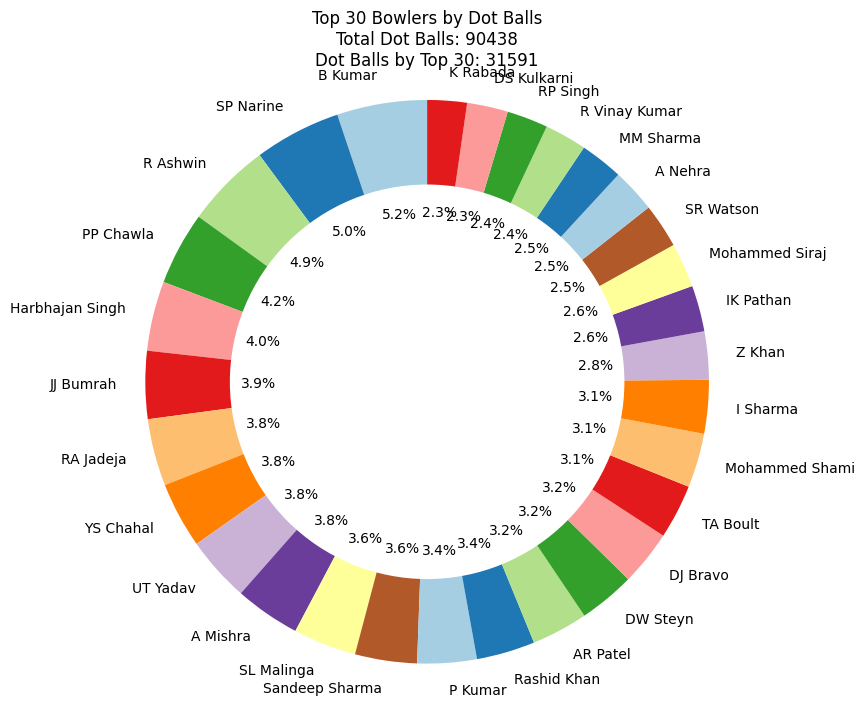

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/ads 1.csv')  # Adjust the path as needed

# Initialize an empty dictionary to track bowlers' dot balls
dot_balls = {}

# Loop through the 'bowler' and 'total_runs' columns to update dot ball counts
for index, row in df.iterrows():
    if row['total_runs'] == 0 and pd.notna(row['bowler']):  # Check if total_runs is 0 (dot ball) and bowler is not NaN
        bowler = row['bowler']
        dot_balls[bowler] = dot_balls.get(bowler, 0) + 1

# Sort the dictionary by dot balls in descending order and get the top 30 bowlers
sorted_dot_balls = sorted(dot_balls.items(), key=lambda item: item[1], reverse=True)
top_30_bowlers = dict(sorted_dot_balls[:30])

# Calculate the sum of dot balls for the top 30 bowlers and for all bowlers
dot_balls_top_30 = sum(top_30_bowlers.values())
total_dot_balls = sum(dot_balls.values())

# Data for the doughnut chart
bowlers = list(top_30_bowlers.keys())
dot_ball_counts = list(top_30_bowlers.values())
print(top_30_bowlers)

# Plotting a doughnut chart
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(dot_ball_counts, labels=bowlers, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a circle at the center to make it a doughnut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title for the chart with dot ball summaries
plt.title(f'Top 30 Bowlers by Dot Balls\nTotal Dot Balls: {total_dot_balls}\nDot Balls by Top 30: {dot_balls_top_30}')

# Show the plot
plt.show()


Counts of each dismissal kind:

The most common dismissal kind (mode) is: caught


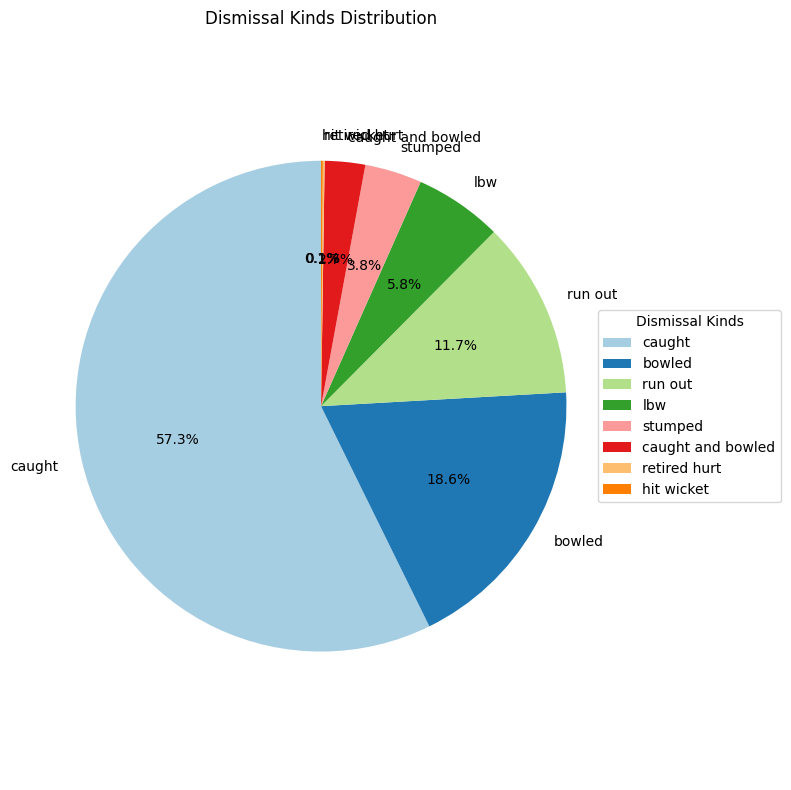

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path_2 = '/content/ads 1.csv'  # Change this to your local path
data_runs = pd.read_csv(file_path_2)

# Initialize all dismissal kinds to 0 and count the occurrences of each kind
dismissal_kinds = data_runs['dismissal_kind'].value_counts()

# Remove any NaN values (which represent no dismissal)
dismissal_kinds = dismissal_kinds.dropna()

# Find the mode of dismissals (the most common type)
mode_of_dismissal = dismissal_kinds.idxmax()

# Display the dismissal counts
print("Counts of each dismissal kind:")

print("\nThe most common dismissal kind (mode) is:", mode_of_dismissal)

# Plotting the pie chart for dismissal kinds
plt.figure(figsize=(8, 8))
plt.pie(dismissal_kinds, labels=dismissal_kinds.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Adding a title
plt.title('Dismissal Kinds Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust legend to make sure it's properly separated and readable
plt.legend(dismissal_kinds.index, title="Dismissal Kinds", loc="center left", bbox_to_anchor=(1, 0.5))

# Show the plot
plt.tight_layout()  # Adjust layout so everything fits without overlap
plt.show()


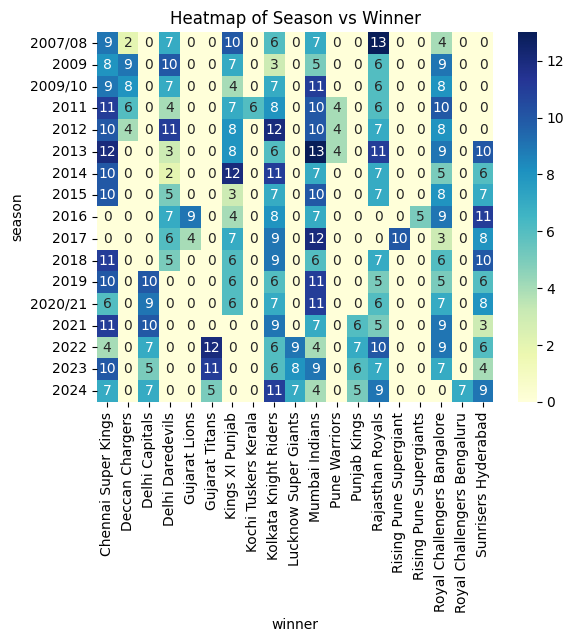

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
file_path = '/content/ads.csv'
data = pd.read_csv(file_path)

# Heatmap
sns.heatmap(pd.crosstab(data['season'], data['winner']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Season vs Winner')
plt.show()

PREDICTIVE ANALYSIS

Frequent Itemset Generation


Apriori Algorithm

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import time

# Load the dataset
data = pd.read_csv('/content/ads.csv')

# Count total games per team, across both team1 and team2 columns
team_counts = pd.concat([data['team1'], data['team2']]).value_counts()
teams_over_30_games = team_counts[team_counts > 30].index

# Count wins for each team in the entire dataset (not filtered) where toss winner is also the match winner
data_win = data[data['toss_winner'] == data['winner']]
win_counts = data_win['winner'].value_counts()

# Identify teams that have won more than 30 games
teams_over_30_wins = win_counts[win_counts > 30].index

# Calculate minimum support based on teams that have won more than 30 games
total_games_won = win_counts[win_counts > 30].sum()
min_support = 30 / len(data_win)

# Print the calculated min_support
print(f"Minimum Support (for teams with over 30 wins): {min_support:.4f}")

# Encode toss decision into a boolean format for Apriori analysis on the full dataset
data['toss_decision_bat'] = data['toss_decision'] == 'bat'
data['toss_decision_field'] = data['toss_decision'] == 'field'

# Create a basket format for Apriori analysis using the entire dataset
basket = pd.DataFrame()
for team in data['toss_winner'].unique():
    basket[team] = data['toss_winner'] == team
basket['bat'] = data['toss_decision_bat']
basket['field'] = data['toss_decision_field']

# Restrict Apriori analysis to columns for teams that won over 30 games
filtered_basket = basket[basket.columns.intersection(teams_over_30_wins.tolist() + ['bat', 'field'])]

# Measure time taken to apply Apriori with the calculated minimum support threshold
start_time = time.time()
frequent_itemsets = apriori(filtered_basket, min_support=min_support, use_colnames=True)
end_time = time.time()
apriori_time = end_time - start_time
print(f"\nTime taken to generate frequent itemsets: {apriori_time:.4f} seconds")

# Display frequent itemsets with the win constraint applied to the teams but excluding "win" from the itemset
print("\nFrequent Itemsets (for teams with over 30 wins):\n", frequent_itemsets)

# Generate association rules based on these frequent itemsets
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
end_time = time.time()
association_rules_time = end_time - start_time
print(f"\nTime taken to generate association rules: {association_rules_time:.4f} seconds")
print("\nAssociation Rules:\n", rules)


Minimum Support (for teams with over 30 wins): 0.0542

Time taken to generate frequent itemsets: 0.0037 seconds

Frequent Itemsets (for teams with over 30 wins):
      support                              itemsets
0   0.103196         (Royal Challengers Bangalore)
1   0.111416                 (Chennai Super Kings)
2   0.109589                    (Rajasthan Royals)
3   0.130594                      (Mumbai Indians)
4   0.077626                     (Kings XI Punjab)
5   0.111416               (Kolkata Knight Riders)
6   0.073059                    (Delhi Daredevils)
7   0.080365                 (Sunrisers Hyderabad)
8   0.357078                                 (bat)
9   0.642922                               (field)
10  0.073059  (field, Royal Challengers Bangalore)
11  0.057534          (field, Chennai Super Kings)
12  0.069406             (field, Rajasthan Royals)
13  0.082192               (Mumbai Indians, field)
14  0.076712        (Kolkata Knight Riders, field)

Time taken to genera

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FP Growth

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time

# Load the dataset
data = pd.read_csv('/content/ads.csv')

# Count total games per team, across both team1 and team2 columns
team_counts = pd.concat([data['team1'], data['team2']]).value_counts()
teams_over_30_games = team_counts[team_counts > 30].index

# Count wins for each team in the entire dataset (not filtered) where toss winner is also the match winner
data_win = data[data['toss_winner'] == data['winner']]
win_counts = data_win['winner'].value_counts()

# Identify teams that have won more than 30 games
teams_over_30_wins = win_counts[win_counts > 30].index

# Calculate minimum support based on teams that have won more than 30 games
total_games_won = win_counts[win_counts > 30].sum()
min_support = 30 / len(data_win)

# Print the calculated min_support
print(f"Minimum Support (for teams with over 30 wins): {min_support:.4f}")

# Encode toss decision into a boolean format for FP-Growth analysis on the full dataset
data['toss_decision_bat'] = data['toss_decision'] == 'bat'
data['toss_decision_field'] = data['toss_decision'] == 'field'

# Create a basket format for FP-Growth analysis using the entire dataset
basket = pd.DataFrame()
for team in data['toss_winner'].unique():
    basket[team] = data['toss_winner'] == team
basket['bat'] = data['toss_decision_bat']
basket['field'] = data['toss_decision_field']

# Restrict FP-Growth analysis to columns for teams that won over 30 games
filtered_basket = basket[basket.columns.intersection(teams_over_30_wins.tolist() + ['bat', 'field'])]

# Measure time taken to apply FP-Growth with the calculated minimum support threshold
start_time = time.time()
frequent_itemsets = fpgrowth(filtered_basket, min_support=min_support, use_colnames=True)
end_time = time.time()
fpgrowth_time = end_time - start_time
print(f"\nTime taken to generate frequent itemsets: {fpgrowth_time:.4f} seconds")

# Display frequent itemsets with the win constraint applied to the teams but excluding "win" from the itemset
print("\nFrequent Itemsets (for teams with over 30 wins):\n", frequent_itemsets)

# Generate association rules based on these frequent itemsets
start_time = time.time()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
end_time = time.time()
association_rules_time = end_time - start_time
print(f"\nTime taken to generate association rules: {association_rules_time:.4f} seconds")
print("\nAssociation Rules:\n", rules)


Minimum Support (for teams with over 30 wins): 0.0542

Time taken to generate frequent itemsets: 0.0077 seconds

Frequent Itemsets (for teams with over 30 wins):
      support                              itemsets
0   0.642922                               (field)
1   0.103196         (Royal Challengers Bangalore)
2   0.357078                                 (bat)
3   0.111416                 (Chennai Super Kings)
4   0.109589                    (Rajasthan Royals)
5   0.130594                      (Mumbai Indians)
6   0.077626                     (Kings XI Punjab)
7   0.111416               (Kolkata Knight Riders)
8   0.073059                    (Delhi Daredevils)
9   0.080365                 (Sunrisers Hyderabad)
10  0.073059  (field, Royal Challengers Bangalore)
11  0.057534          (field, Chennai Super Kings)
12  0.069406             (field, Rajasthan Royals)
13  0.082192               (Mumbai Indians, field)
14  0.076712        (Kolkata Knight Riders, field)

Time taken to genera

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Closed Frequent Itemsets (ACLOSE)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Load the dataset
file_path = '/content/ads.csv'
data = pd.read_csv(file_path)

# Step 1: Transform the dataset
data['home_team_won_toss'] = data.apply(
    lambda row: 'Yes' if row['team1'] == row['toss_winner'] else 'No', axis=1
)
data['home_team_won_game'] = data.apply(
    lambda row: 'Yes' if row['team1'] == row['winner'] else 'No', axis=1
)

# Keep only relevant columns
transformed_data = data[['venue', 'team1', 'home_team_won_toss', 'home_team_won_game']]

# Step 2: Filter by venue constraint (at least 20 games)
venue_counts = transformed_data['venue'].value_counts()
valid_venues = venue_counts[venue_counts >= 20].index
filtered_data = transformed_data[transformed_data['venue'].isin(valid_venues)]

# Step 3: Prepare data for closed frequent itemsets
# Convert to a one-hot encoded DataFrame
one_hot = pd.get_dummies(filtered_data, columns=['venue', 'team1', 'home_team_won_toss', 'home_team_won_game'])

# Step 4: Run Apriori to find frequent itemsets
min_support_value = 40 / len(filtered_data)
frequent_itemsets = apriori(one_hot, min_support=min_support_value, use_colnames=True)

# Step 5: Identify closed frequent itemsets (with more than one member)
closed_itemsets = []
for idx, row in frequent_itemsets.iterrows():
    is_closed = True
    for idx2, row2 in frequent_itemsets.iterrows():
        # Check if the current itemset is a subset of another with the same support and not the same itemset
        if set(row['itemsets']).issubset(row2['itemsets']) and row['support'] == row2['support'] and row['itemsets'] != row2['itemsets']:
            is_closed = False
            break
    if is_closed:
        closed_itemsets.append(row)

# Convert closed itemsets to DataFrame
closed_itemsets_df = pd.DataFrame(closed_itemsets)

# Filter to only include itemsets with more than one member
closed_itemsets_multi = closed_itemsets_df[closed_itemsets_df['itemsets'].apply(len) > 1]

# Display results
print("Minimum Support Value:", min_support_value)
print("\nClosed Frequent Itemsets (ACLOSE):")
print(closed_itemsets_multi)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Minimum Support Value: 0.05747126436781609

Closed Frequent Itemsets (ACLOSE):
     support                                           itemsets
21  0.094828  (venue_Eden Gardens, team1_Kolkata Knight Riders)
22  0.068966        (venue_Eden Gardens, home_team_won_toss_No)
23  0.064655       (venue_Eden Gardens, home_team_won_game_Yes)
24  0.080460   (venue_Feroz Shah Kotla, team1_Delhi Daredevils)
25  0.086207  (team1_Royal Challengers Bangalore, venue_M Ch...
26  0.058908  (venue_M Chinnaswamy Stadium, home_team_won_to...
27  0.064655  (team1_Chennai Super Kings, venue_MA Chidambar...
28  0.057471  (venue_Sawai Mansingh Stadium, team1_Rajasthan...
29  0.087644     (venue_Wankhede Stadium, team1_Mumbai Indians)
30  0.057471    (home_team_won_toss_No, venue_Wankhede Stadium)
31  0.058908   (venue_Wankhede Stadium, home_team_won_game_Yes)
32  0.074713  (home_team_won_toss_No, team1_Chennai Super Ki...
33  0.076149  (team1_Chennai Super Kings, home_team_won_game...
34  0.083333  (home_team_

MAXIMAL FREQUENT ITEMSET(Princer Search Method)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Load the dataset
file_path = '/content/ads.csv'
data = pd.read_csv(file_path)

# Step 1: Transform the dataset
data['home_team_won_toss'] = data.apply(
    lambda row: 'Yes' if row['team1'] == row['toss_winner'] else 'No', axis=1
)
data['home_team_won_game'] = data.apply(
    lambda row: 'Yes' if row['team1'] == row['winner'] else 'No', axis=1
)

# Keep only relevant columns
transformed_data = data[['venue', 'team1', 'home_team_won_toss', 'home_team_won_game']]

# Step 2: Filter by venue constraint (at least 20 games)
venue_counts = transformed_data['venue'].value_counts()
valid_venues = venue_counts[venue_counts >= 20].index
filtered_data = transformed_data[transformed_data['venue'].isin(valid_venues)]

# Step 3: Prepare data for maximal frequent itemsets
# Convert to a one-hot encoded DataFrame
one_hot = pd.get_dummies(filtered_data, columns=['venue', 'team1', 'home_team_won_toss', 'home_team_won_game'])

# Step 4: Run Apriori to find frequent itemsets
min_support_value = 40 / len(filtered_data)
frequent_itemsets = apriori(one_hot, min_support=min_support_value, use_colnames=True)

# Step 5: Identify maximal frequent itemsets (with more than one member)
maximal_itemsets = []
for idx, row in frequent_itemsets.iterrows():
    is_maximal = True
    for idx2, row2 in frequent_itemsets.iterrows():
        # Check if the current itemset is a subset of another and is frequent
        if row['itemsets'].issubset(row2['itemsets']) and row['itemsets'] != row2['itemsets']:
            is_maximal = False
            break
    if is_maximal:
        maximal_itemsets.append(row)

# Convert maximal itemsets to DataFrame
maximal_itemsets_df = pd.DataFrame(maximal_itemsets)

# Filter to only include itemsets with more than one member
maximal_itemsets_multi = maximal_itemsets_df[maximal_itemsets_df['itemsets'].apply(len) > 1]

# Display results
print("Minimum Support Value:", min_support_value)
print("\nMaximal Frequent Itemsets (MFI):")
print(maximal_itemsets_multi)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Minimum Support Value: 0.028735632183908046

Maximal Frequent Itemsets (MFI):
      support                                           itemsets
29   0.034483  (home_team_won_toss_No, venue_Dubai Internatio...
30   0.031609  (venue_Dubai International Cricket Stadium, ho...
31   0.031609  (home_team_won_game_No, venue_Dubai Internatio...
32   0.034483  (venue_Dubai International Cricket Stadium, ho...
55   0.035920  (venue_Rajiv Gandhi International Stadium, Upp...
56   0.034483  (venue_Rajiv Gandhi International Stadium, Upp...
57   0.035920  (venue_Rajiv Gandhi International Stadium, Upp...
63   0.028736  (home_team_won_toss_No, venue_Sharjah Cricket ...
80   0.028736    (team1_Kings XI Punjab, home_team_won_toss_Yes)
81   0.038793     (home_team_won_game_No, team1_Kings XI Punjab)
82   0.033046    (team1_Kings XI Punjab, home_team_won_game_Yes)
93   0.043103    (home_team_won_game_No, team1_Rajasthan Royals)
100  0.038793  (home_team_won_toss_Yes, team1_Sunrisers Hyder...
101  0.04454

ECLAT ALGORITHM (VERTICAL TRANSACTION)

In [ ]:
import pandas as pd
from itertools import combinations

# Load the dataset
file_path = '/content/ads.csv'
data = pd.read_csv(file_path)

# Step 1: Transform the dataset
data['home_team_won_toss'] = data.apply(
    lambda row: 'Home team won toss' if row['team1'] == row['toss_winner'] else 'Away team won toss', axis=1
)
data['home_team_won_game'] = data.apply(
    lambda row: 'Home team won' if row['team1'] == row['winner'] else 'Home team lost', axis=1
)

# Keep only relevant columns
transformed_data = data[['venue', 'team1', 'home_team_won_toss', 'home_team_won_game']]

# Step 2: Filter by venue constraint (at least 20 games)
venue_counts = transformed_data['venue'].value_counts()
valid_venues = venue_counts[venue_counts >= 20].index
filtered_data = transformed_data[transformed_data['venue'].isin(valid_venues)]

# Step 3: Create the initial itemset dictionary
item_transaction_dict = {}
for index, row in filtered_data.iterrows():
    transaction = frozenset(row)
    for item in transaction:
        if item not in item_transaction_dict:
            item_transaction_dict[item] = set()
        item_transaction_dict[item].add(index)

# Step 4: Define the minimum support
min_support_value = 40 / len(filtered_data)
print("Minimum Support Value:", min_support_value)

# Step 5: Run the ECLAT algorithm
def eclat(prefix, items, min_support, item_transaction_dict):
    if not items:
        return

    for item in items:
        # Skip items not in the dictionary
        if item not in item_transaction_dict:
            continue

        new_prefix = prefix | {item}
        transaction_set = item_transaction_dict[item]

        # Check if the support is sufficient
        support = len(transaction_set) / len(filtered_data)
        if support >= min_support:
            # Print the frequent itemset with labels
            print(f"Frequent Itemset: {new_prefix}, Support: {support:.2f}")

            # Create new items for further exploration
            new_items = [other_item for other_item in items if other_item > item]
            new_item_transaction_dict = {
                other_item: item_transaction_dict[other_item].intersection(transaction_set)
                for other_item in new_items
                if other_item in item_transaction_dict and item_transaction_dict[other_item].intersection(transaction_set)
            }

            # Recursively call ECLAT for further exploration
            eclat(new_prefix, new_items, min_support, new_item_transaction_dict)

# Run the ECLAT algorithm
eclat(set(), list(item_transaction_dict.keys()), min_support_value, item_transaction_dict)


Minimum Support Value: 0.05747126436781609
Frequent Itemset: {'Home team lost'}, Support: 0.49
Frequent Itemset: {'Home team lost', 'Home team won toss'}, Support: 0.20
Frequent Itemset: {'Home team lost', 'Royal Challengers Bangalore'}, Support: 0.07
Frequent Itemset: {'Home team lost', 'Kolkata Knight Riders'}, Support: 0.06
Frequent Itemset: {'Home team won toss'}, Support: 0.41
Frequent Itemset: {'Mumbai Indians', 'Home team won toss'}, Support: 0.06
Frequent Itemset: {'M Chinnaswamy Stadium'}, Support: 0.09
Frequent Itemset: {'M Chinnaswamy Stadium', 'Royal Challengers Bangalore'}, Support: 0.09
Frequent Itemset: {'Royal Challengers Bangalore'}, Support: 0.13
Frequent Itemset: {'Kings XI Punjab'}, Support: 0.07
Frequent Itemset: {'Away team won toss'}, Support: 0.59
Frequent Itemset: {'Home team lost', 'Away team won toss'}, Support: 0.30
Frequent Itemset: {'M Chinnaswamy Stadium', 'Away team won toss'}, Support: 0.06
Frequent Itemset: {'Away team won toss', 'Royal Challengers Ban

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LONGEST FREQUENT ITEMSET (LFI)

In [7]:
import pandas as pd

# Load the dataset
file_path = '/content/matches.csv'
data = pd.read_csv(file_path)

# Step 1: Transform the dataset
data['home_team_won_toss'] = data.apply(
    lambda row: 'Home team won toss' if row['team1'] == row['toss_winner'] else 'Away team won toss', axis=1
)
data['home_team_won_game'] = data.apply(
    lambda row: 'Home team won' if row['team1'] == row['winner'] else 'Home team lost', axis=1
)

# Keep only relevant columns
transformed_data = data[['venue', 'team1', 'home_team_won_toss', 'home_team_won_game']]

# Step 2: Filter by venue constraint (at least 20 games)
venue_counts = transformed_data['venue'].value_counts()
valid_venues = venue_counts[venue_counts >= 20].index
filtered_data = transformed_data[transformed_data['venue'].isin(valid_venues)]

# Step 3: Create the initial itemset dictionary
item_transaction_dict = {}
for index, row in filtered_data.iterrows():
    transaction = frozenset(row)
    for item in transaction:
        if item not in item_transaction_dict:
            item_transaction_dict[item] = set()
        item_transaction_dict[item].add(index)

# Step 4: Define the minimum support
min_support_value = 40 / len(filtered_data)
print("Minimum Support Value:", min_support_value)

# Step 5: Run the ECLAT algorithm for LFI
def eclat_lfi(prefix, items, min_support, item_transaction_dict):
    if not items:
        return []

    longest_itemsets = []
    for item in items:
        if item not in item_transaction_dict:
            continue

        new_prefix = prefix | {item}
        transaction_set = item_transaction_dict[item]

        # Check if the support is sufficient
        support = len(transaction_set) / len(filtered_data)
        if support >= min_support:
            # Explore further combinations
            new_items = [other_item for other_item in items if other_item > item]
            new_item_transaction_dict = {
                other_item: item_transaction_dict[other_item].intersection(transaction_set)
                for other_item in new_items
                if other_item in item_transaction_dict and item_transaction_dict[other_item].intersection(transaction_set)
            }

            # Recursive call
            sub_longest_itemsets = eclat_lfi(new_prefix, new_items, min_support, new_item_transaction_dict)

            # If no longer itemsets are found, this is a longest itemset
            if not sub_longest_itemsets:
                longest_itemsets.append((new_prefix, support))
            else:
                longest_itemsets.extend(sub_longest_itemsets)

    return longest_itemsets

# Run the ECLAT algorithm
longest_frequent_itemsets = eclat_lfi(set(), list(item_transaction_dict.keys()), min_support_value, item_transaction_dict)

# Step 6: Display the Longest Frequent Itemsets (LFI)
print("\nLongest Frequent Itemsets (LFI):")
for itemset, support in longest_frequent_itemsets:
    print(f"Itemset: {itemset}, Support: {support:.2f}")


Minimum Support Value: 0.05747126436781609

Longest Frequent Itemsets (LFI):
Itemset: {'Home team won toss', 'Mumbai Indians'}, Support: 0.06
Itemset: {'Home team lost', 'Home team won toss'}, Support: 0.20
Itemset: {'Home team lost', 'Royal Challengers Bangalore'}, Support: 0.07
Itemset: {'Home team lost', 'Kolkata Knight Riders'}, Support: 0.06
Itemset: {'Royal Challengers Bangalore'}, Support: 0.13
Itemset: {'Royal Challengers Bangalore', 'M Chinnaswamy Stadium'}, Support: 0.09
Itemset: {'Home team lost', 'Away team won toss'}, Support: 0.30
Itemset: {'Away team won toss', 'Royal Challengers Bangalore'}, Support: 0.09
Itemset: {'Away team won toss', 'M Chinnaswamy Stadium'}, Support: 0.06
Itemset: {'Home team won', 'Away team won toss'}, Support: 0.30
Itemset: {'Mumbai Indians', 'Away team won toss'}, Support: 0.07
Itemset: {'Away team won toss', 'Wankhede Stadium'}, Support: 0.06
Itemset: {'Away team won toss', 'Eden Gardens'}, Support: 0.07
Itemset: {'Away team won toss', 'Kolkata

**The whole idea of this analysis is predicting the man of the match for a particular game,by comparing the top 6 performers of each game which we do in classification and clustering**

CLASSIFICATION

DECISION TREE CLASSIFICATION

Confusion Matrix:
[[1002   88]
 [ 119   81]]

Precision (no): 89.38%
Precision (yes): 47.93%

Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.92      0.91      1090
         yes       0.48      0.41      0.44       200

    accuracy                           0.84      1290
   macro avg       0.69      0.66      0.67      1290
weighted avg       0.83      0.84      0.83      1290



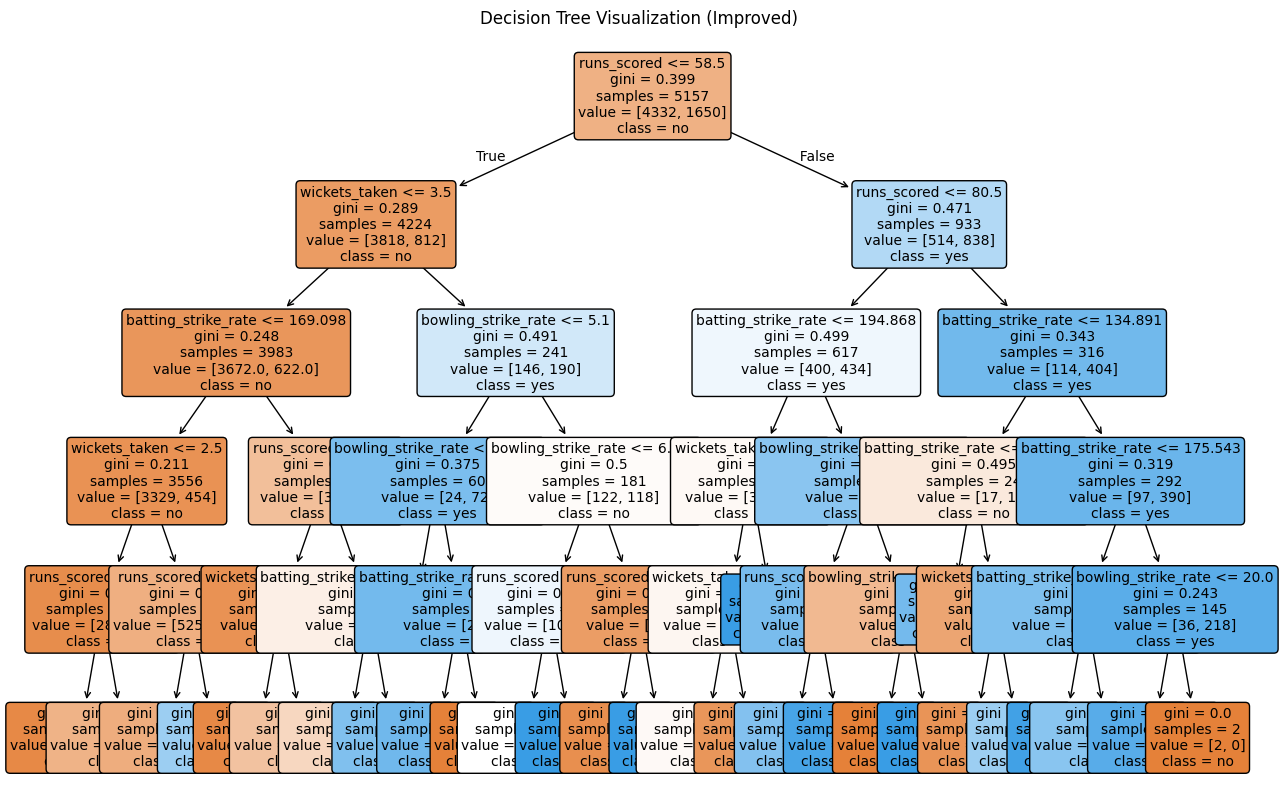

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/final_output_4.csv'
data = pd.read_csv(file_path)

# Define relevant features and class label
features = ['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']
class_label = 'player_of_match'

# Split data into training (80%) and testing (20%) sets
split_index = int(len(data) * 0.8)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

X_train = train_data[features]
y_train = train_data[class_label]
X_test = test_data[features]
y_test = test_data[class_label]

# Initialize and train the Decision Tree Classifier with improved parameters
clf = DecisionTreeClassifier(
    random_state=42,
    class_weight={'no': 1, 'yes': 2},  # Penalize misclassifications of "yes" more heavily
    max_depth=5,                       # Limit the depth of the tree to reduce overfitting
    min_samples_split=10               # Ensure splits are meaningful by requiring more samples
)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision percentages
precision_no = class_report['no']['precision'] * 100
precision_yes = class_report['yes']['precision'] * 100

# Display results
print("Confusion Matrix:")
print(conf_matrix)

print(f"\nPrecision (no): {precision_no:.2f}%")
print(f"Precision (yes): {precision_yes:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=features, class_names=clf.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization (Improved)")
plt.show()


NAIVE BAYES CLASSIFICATION

Confusion Matrix:
[[999  91]
 [119  81]]

Precision (no): 89.36%
Precision (yes): 47.09%

Classification Report:
              precision    recall  f1-score   support

          no       0.89      0.92      0.90      1090
         yes       0.47      0.41      0.44       200

    accuracy                           0.84      1290
   macro avg       0.68      0.66      0.67      1290
weighted avg       0.83      0.84      0.83      1290



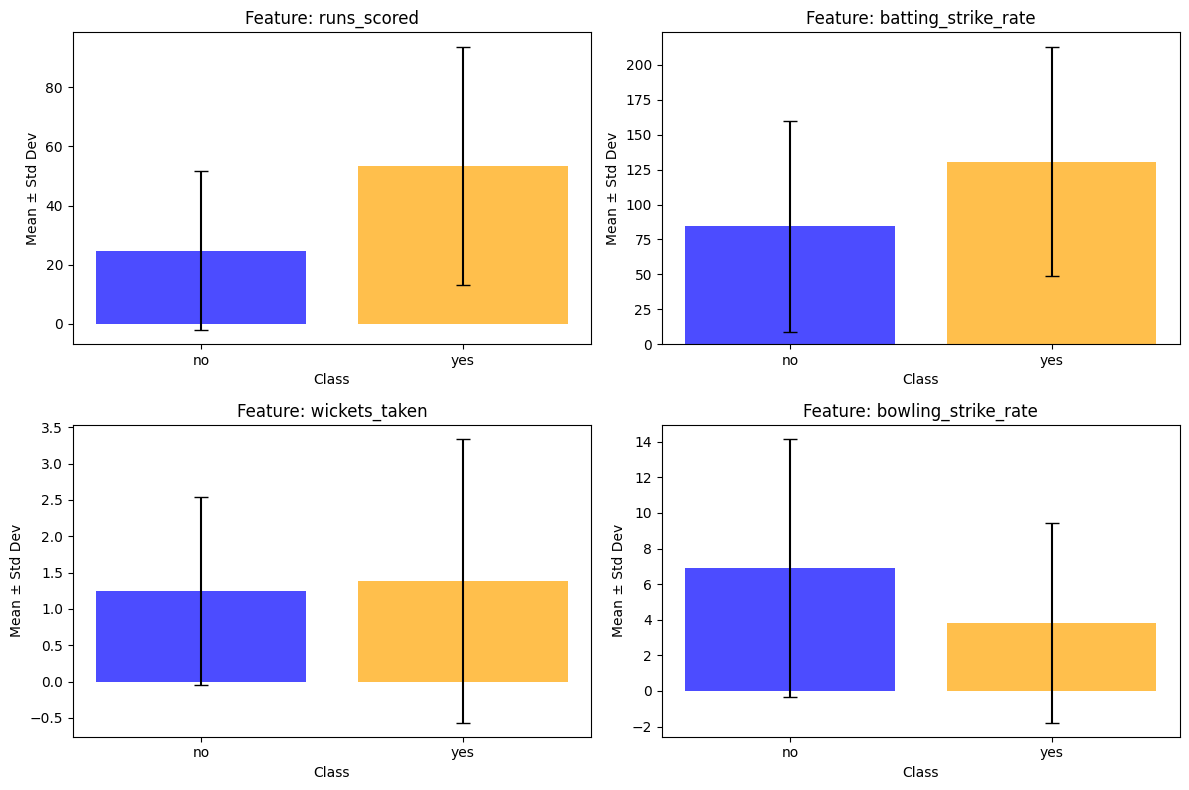

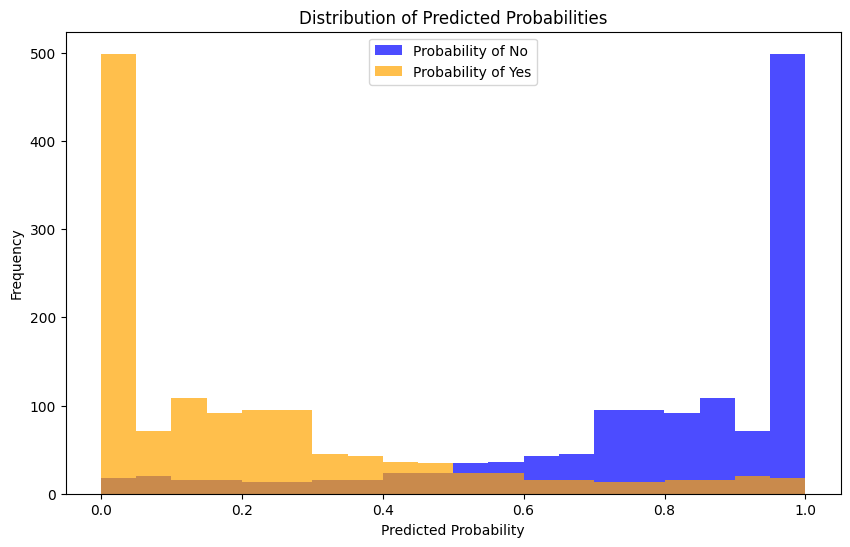

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/final_output_4.csv'
data = pd.read_csv(file_path)

# Define relevant features and class label
features = ['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']
class_label = 'player_of_match'

# Split data into training (80%) and testing (20%) sets
split_index = int(len(data) * 0.8)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

X_train = train_data[features]
y_train = train_data[class_label]
X_test = test_data[features]
y_test = test_data[class_label]

# Calculate class priors based on training data
class_counts = y_train.value_counts()
total_count = len(y_train)
priors = {
    'no': class_counts['no'] / total_count,
    'yes': class_counts['yes'] / total_count
}

# Initialize and train the Gaussian Naive Bayes Classifier with prior probabilities
clf = GaussianNB(priors=[priors['no'], priors['yes']])
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision percentages
precision_no = class_report['no']['precision'] * 100
precision_yes = class_report['yes']['precision'] * 100

# Display results
print("Confusion Matrix:")
print(conf_matrix)

print(f"\nPrecision (no): {precision_no:.2f}%")
print(f"Precision (yes): {precision_yes:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature influence visualization (mean and variance per class)
class_stats = train_data.groupby(class_label)[features].agg(['mean', 'var'])
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()
for idx, feature in enumerate(features):
    means = class_stats[(feature, 'mean')]
    variances = class_stats[(feature, 'var')]
    axes[idx].bar(means.index, means, yerr=np.sqrt(variances), color=['blue', 'orange'], alpha=0.7, capsize=5)
    axes[idx].set_title(f"Feature: {feature}")
    axes[idx].set_ylabel("Mean ± Std Dev")
    axes[idx].set_xlabel("Class")
plt.tight_layout()
plt.show()

# Predicted probabilities for test set
y_prob = clf.predict_proba(X_test)

# Visualize class probabilities
plt.figure(figsize=(10, 6))
plt.hist(y_prob[:, 0], bins=20, alpha=0.7, label='Probability of No', color='blue')
plt.hist(y_prob[:, 1], bins=20, alpha=0.7, label='Probability of Yes', color='orange')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


 XG BOOST CLASSIFCATION

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:52:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Accuracy: 51.38%

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       110
           1       0.51      0.56      0.54       108

    accuracy                           0.51       218
   macro avg       0.51      0.51      0.51       218
weighted avg       0.51      0.51      0.51       218


Sample Predictions on Test Data:
      team1_Deccan Chargers  team1_Delhi Capitals  team1_Delhi Daredevils  \
834                     0.0                   0.0                     0.0   
940                     0.0                   1.0                     0.0   
1084                    0.0                   0.0                     0.0   
1005                    0.0                   0.0                     0.0   
760                     0.0                   0.0                     0.0   
290                     0.0                   0.0                     0.0   
523                     0.0                   0.0   

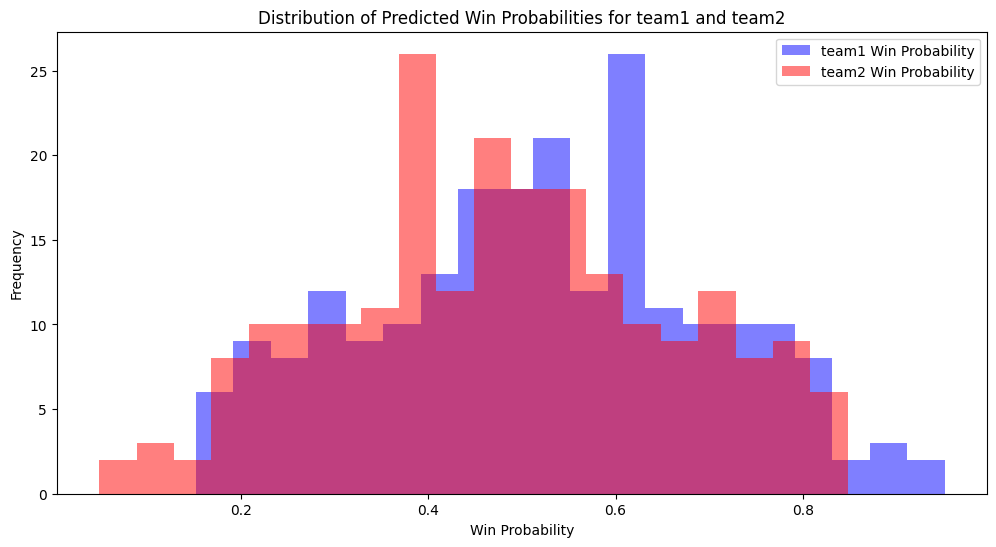

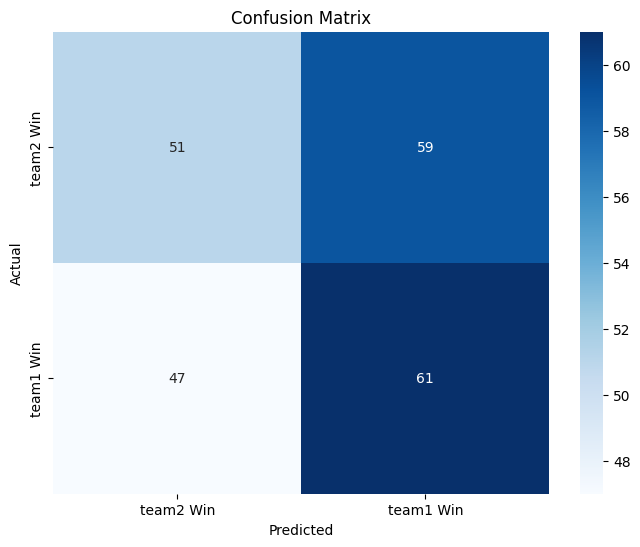

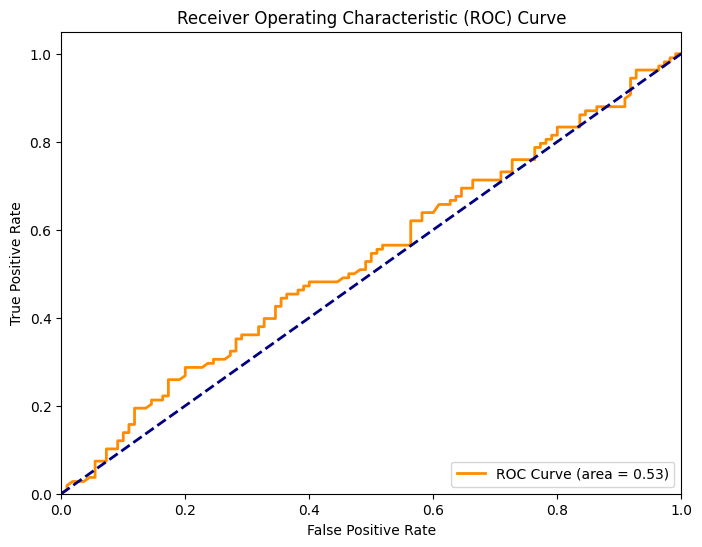

In [2]:
# Import necessary libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the dataset
data = pd.read_csv('/content/matches.csv')

# Filter out rows with missing values in 'winner' column if any
data = data.dropna(subset=['winner'])

# Step 1: Encoding Team Names with One-Hot Encoding

# Initialize OneHotEncoder for team names and venue
data_team1 = data[['team1']].rename(columns={'team1': 'team'})
data_team2 = data[['team2']].rename(columns={'team2': 'team'})
data_venue = data[['venue']]

# Fit the encoder on combined unique values from both columns and venue
teams_combined = pd.concat([data_team1, data_team2]).drop_duplicates()
encoder_teams = OneHotEncoder(drop='first', sparse_output=False)
encoder_teams.fit(teams_combined)

# Fit encoder for venue
encoder_venue = OneHotEncoder(drop='first', sparse_output=False)
encoder_venue.fit(data_venue)

# Transform each column individually
team1_encoded = encoder_teams.transform(data_team1)
team2_encoded = encoder_teams.transform(data_team2)
venue_encoded = encoder_venue.transform(data_venue)

# Convert encoded arrays to DataFrames with proper column names
team1_encoded_df = pd.DataFrame(team1_encoded, columns=[f"team1_{team}" for team in encoder_teams.categories_[0][1:]])
team2_encoded_df = pd.DataFrame(team2_encoded, columns=[f"team2_{team}" for team in encoder_teams.categories_[0][1:]])
venue_encoded_df = pd.DataFrame(venue_encoded, columns=[f"venue_{venue}" for venue in encoder_venue.categories_[0][1:]])

# Concatenate the original data with the encoded team and venue columns
data_encoded = pd.concat([data.reset_index(drop=True), team1_encoded_df, team2_encoded_df, venue_encoded_df], axis=1)

# Encode toss decision as a binary variable: 1 for 'bat', 0 for 'field'
data_encoded['toss_decision'] = data_encoded['toss_decision'].apply(lambda x: 1 if x == 'bat' else 0)

# Define the target variable: 1 if team1 won, 0 if team2 won
data_encoded['team1_win'] = (data_encoded['winner'] == data_encoded['team1']).astype(int)

# Step 2: Select Features and Target

# Choose features including encoded teams, venue, and toss decision
features = list(team1_encoded_df.columns) + list(team2_encoded_df.columns) + list(venue_encoded_df.columns) + ['toss_decision']
X = data_encoded[features]
y = data_encoded['team1_win']

# Step 3: Split the Data into Training and Testing Sets

# Use 80% of data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and Train the XGBoost Model

# Initialize XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Data

# Predict outcomes and probabilities for the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Step 6: Evaluate Model Performance

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Show sample predictions for test data with winning probabilities for team1 and team2
print("\nSample Predictions on Test Data:")
test_data_predictions = pd.DataFrame({
    'predicted_outcome': y_pred,
    'team1_win_probability': y_pred_proba[:, 1],  # Probability of team1 winning
    'team2_win_probability': y_pred_proba[:, 0]   # Probability of team2 winning
}, index=X_test.index)

# Concatenate with test features for a full view
sample_predictions = pd.concat([X_test, test_data_predictions], axis=1)
print(sample_predictions.head(10))

# Step 7: Visualization - Probability Distribution, Confusion Matrix, ROC Curve

# Plot Probability Distribution for team1 and team2 win predictions
plt.figure(figsize=(12, 6))
plt.hist(test_data_predictions['team1_win_probability'], bins=20, alpha=0.5, label='team1 Win Probability', color='blue')
plt.hist(test_data_predictions['team2_win_probability'], bins=20, alpha=0.5, label='team2 Win Probability', color='red')
plt.xlabel('Win Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Win Probabilities for team1 and team2')
plt.legend()
plt.show()

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['team2 Win', 'team1 Win'], yticklabels=['team2 Win', 'team1 Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve for team1 win prediction
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


CLUSTERING


K MEANS CLUSTERING


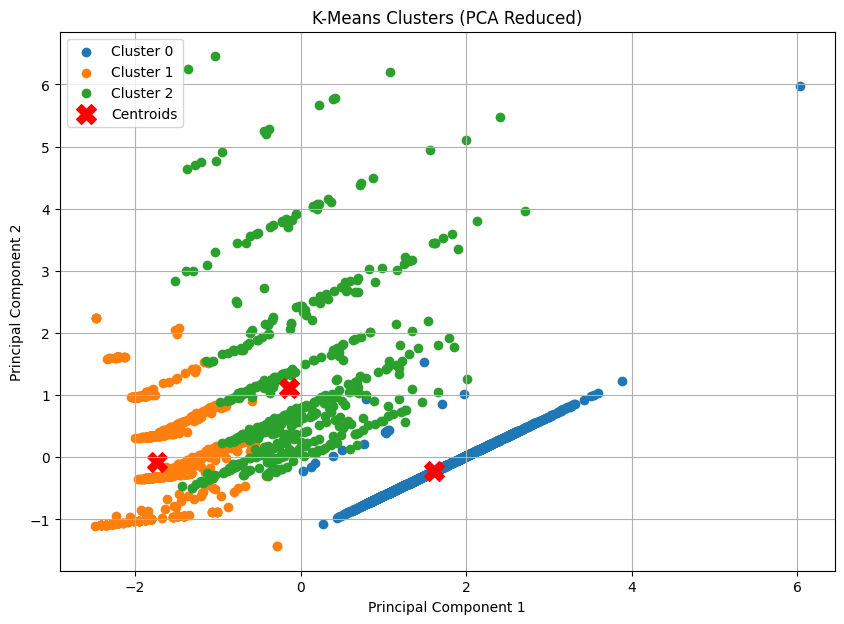

Silhouette Score for Clustering: 0.5881296943231261

Confusion Matrix (Counts):
[[976 114]
 [125  75]]

Confusion Matrix (Percentages):
[[75.65891473  8.8372093 ]
 [ 9.68992248  5.81395349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1090
           1       0.40      0.38      0.39       200

    accuracy                           0.81      1290
   macro avg       0.64      0.64      0.64      1290
weighted avg       0.81      0.81      0.81      1290


Feature Importances:
               Feature  Importance
0          runs_scored    0.437856
1  batting_strike_rate    0.383581
2        wickets_taken    0.089046
3  bowling_strike_rate    0.085152
4              Cluster    0.004364

Cluster Centroids:
   runs_scored  batting_strike_rate  wickets_taken  bowling_strike_rate
0     0.766846             0.705356      -0.890987            -0.896414
1    -0.921484            -1.043534       0.736284            

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('/content/final_output_4.csv')  # Replace with your file path
data_cleaned = data.drop(columns=['id', 'player'])

# Encode 'player_of_match' as binary labels (yes=1, no=0)
label_encoder = LabelEncoder()
data_cleaned['player_of_match'] = label_encoder.fit_transform(data_cleaned['player_of_match'])

X = data_cleaned[['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']]
y = data_cleaned['player_of_match']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_train_scaled)

# Evaluate clustering quality using Silhouette Score
silhouette_avg = silhouette_score(X_train_scaled, kmeans_clusters)

# Visualize clusters with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))
for cluster_label in set(kmeans_clusters):
    cluster_points = X_train_pca[kmeans_clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids to PCA space
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', marker='X', label="Centroids")

plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Add cluster labels as a new feature
X_train_with_clusters = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_with_clusters['Cluster'] = kmeans_clusters

X_test_with_clusters = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_with_clusters['Cluster'] = kmeans.predict(X_test_scaled)

# Step 2: Train a Decision Tree Classifier with the additional cluster feature
classifier_kmeans = DecisionTreeClassifier(random_state=42)
classifier_kmeans.fit(X_train_with_clusters, y_train)

# Predict on the test set
y_pred_kmeans = classifier_kmeans.predict(X_test_with_clusters)

# Confusion matrix and classification report
conf_matrix_kmeans = confusion_matrix(y_test, y_pred_kmeans)
conf_matrix_kmeans_percent = (conf_matrix_kmeans / conf_matrix_kmeans.sum()) * 100
class_report_kmeans = classification_report(y_test, y_pred_kmeans)

# Feature importance (including the cluster feature)
feature_importances_kmeans = pd.DataFrame({
    'Feature': list(X_train_with_clusters.columns),
    'Importance': classifier_kmeans.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Output results
print("Silhouette Score for Clustering:", silhouette_avg)
print("\nConfusion Matrix (Counts):")
print(conf_matrix_kmeans)
print("\nConfusion Matrix (Percentages):")
print(conf_matrix_kmeans_percent)
print("\nClassification Report:")
print(class_report_kmeans)
print("\nFeature Importances:")
print(feature_importances_kmeans)

# Step 3: Analyze the clusters
# Calculate the cluster centers (centroids)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate'])
print("\nCluster Centroids:")
print(centroids)

# Analyze the distribution of features in each cluster
for cluster_label in set(kmeans_clusters):
    print(f"\nCluster {cluster_label} Analysis:")
    cluster_data = X_train_with_clusters[X_train_with_clusters['Cluster'] == cluster_label]
    print(cluster_data.describe())  # Provide summary statistics for each cluster


K MEDIODS CLUSTERING

Silhouette Score for Clustering: 0.5567430951626964


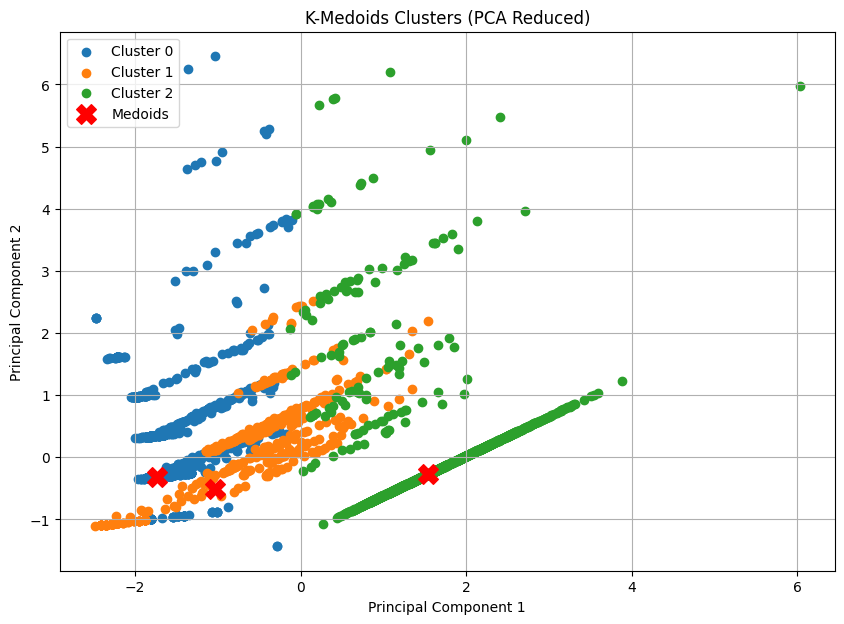


Confusion Matrix (Counts):
[[979 111]
 [121  79]]

Confusion Matrix (Percentages):
[[75.89147287  8.60465116]
 [ 9.37984496  6.12403101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1090
           1       0.42      0.40      0.41       200

    accuracy                           0.82      1290
   macro avg       0.65      0.65      0.65      1290
weighted avg       0.82      0.82      0.82      1290


Feature Importances:
               Feature  Importance
0          runs_scored    0.439023
1  batting_strike_rate    0.381247
3  bowling_strike_rate    0.086160
2        wickets_taken    0.080672
4              Cluster    0.012898

Cluster Medoids:
   runs_scored  batting_strike_rate  wickets_taken  bowling_strike_rate
0    -0.940214            -1.165492       0.514942             0.786658
1    -0.555992            -0.076388      -0.191135             1.630807
2     0.692727             0.634555      -0.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids  # Import KMedoids from sklearn_extra

# Load and preprocess the dataset
data = pd.read_csv('/content/final_output_4.csv')  # Replace with your file path
data_cleaned = data.drop(columns=['id', 'player'])

# Encode 'player_of_match' as binary labels (yes=1, no=0)
label_encoder = LabelEncoder()
data_cleaned['player_of_match'] = label_encoder.fit_transform(data_cleaned['player_of_match'])

X = data_cleaned[['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']]
y = data_cleaned['player_of_match']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Apply K-Medoids Clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)  # Specify the number of clusters
kmedoids_clusters = kmedoids.fit_predict(X_train_scaled)

# Evaluate clustering quality using Silhouette Score
silhouette_avg = silhouette_score(X_train_scaled, kmedoids_clusters)
print(f"Silhouette Score for Clustering: {silhouette_avg}")

# Visualize clusters with PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 7))
for cluster_label in set(kmedoids_clusters):
    cluster_points = X_train_pca[kmedoids_clusters == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

# Plot the centroids (medoids)
medoids_pca = pca.transform(kmedoids.cluster_centers_)  # Transform medoids to PCA space
plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], s=200, c='red', marker='X', label="Medoids")

plt.title('K-Medoids Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Add cluster labels as a new feature
X_train_with_clusters = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_with_clusters['Cluster'] = kmedoids_clusters

X_test_with_clusters = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_with_clusters['Cluster'] = kmedoids.predict(X_test_scaled)

# Step 2: Train a Decision Tree Classifier with the additional cluster feature
classifier_kmedoids = DecisionTreeClassifier(random_state=42)
classifier_kmedoids.fit(X_train_with_clusters, y_train)

# Predict on the test set
y_pred_kmedoids = classifier_kmedoids.predict(X_test_with_clusters)

# Confusion matrix and classification report
conf_matrix_kmedoids = confusion_matrix(y_test, y_pred_kmedoids)
conf_matrix_kmedoids_percent = (conf_matrix_kmedoids / conf_matrix_kmedoids.sum()) * 100
class_report_kmedoids = classification_report(y_test, y_pred_kmedoids)

# Feature importance (including the cluster feature)
feature_importances_kmedoids = pd.DataFrame({
    'Feature': list(X_train_with_clusters.columns),
    'Importance': classifier_kmedoids.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Output results
print("\nConfusion Matrix (Counts):")
print(conf_matrix_kmedoids)
print("\nConfusion Matrix (Percentages):")
print(conf_matrix_kmedoids_percent)
print("\nClassification Report:")
print(class_report_kmedoids)
print("\nFeature Importances:")
print(feature_importances_kmedoids)

# Step 3: Analyze the clusters
# Calculate the cluster centers (medoids)
medoids = pd.DataFrame(kmedoids.cluster_centers_, columns=['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate'])
print("\nCluster Medoids:")
print(medoids)

# Analyze the distribution of features in each cluster
for cluster_label in set(kmedoids_clusters):
    print(f"\nCluster {cluster_label} Analysis:")
    cluster_data = X_train_with_clusters[X_train_with_clusters['Cluster'] == cluster_label]
    print(cluster_data.describe())  # Provide summary statistics for each cluster


In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.6 MB/s eta 0:00:00


HEIRARICHAL CLUSTERING

AGGLOMERATIVE ALGORITHM (AGNUS)

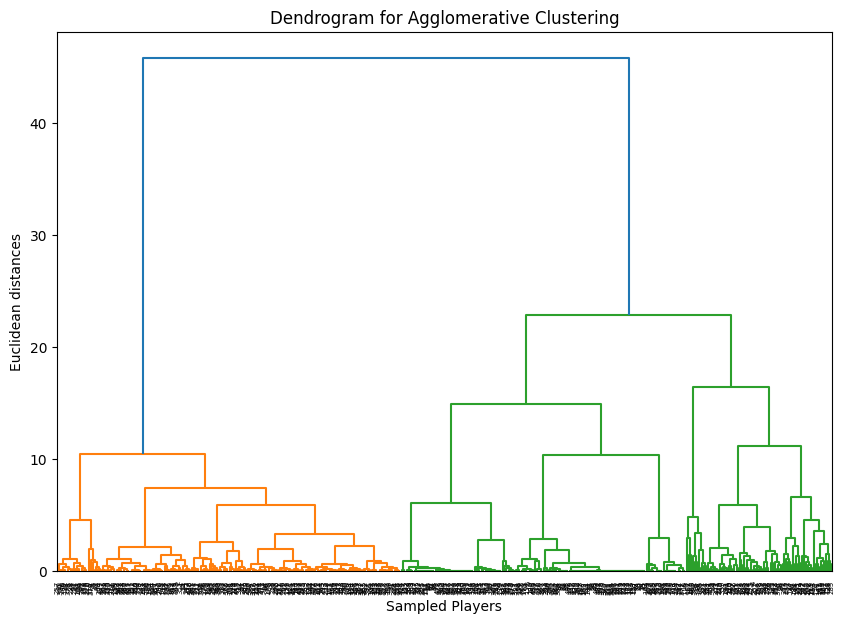

<ipython-input-14-e854107401c3>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Cluster'] = cluster_labels


Cluster Characteristics:
         runs_scored  batting_strike_rate  wickets_taken  bowling_strike_rate
Cluster                                                                      
0           0.054470             0.703082       2.327235             11.84510
1          53.924840           150.782702       0.000000              0.00000
2          28.518173           139.566577       2.450140             11.57274


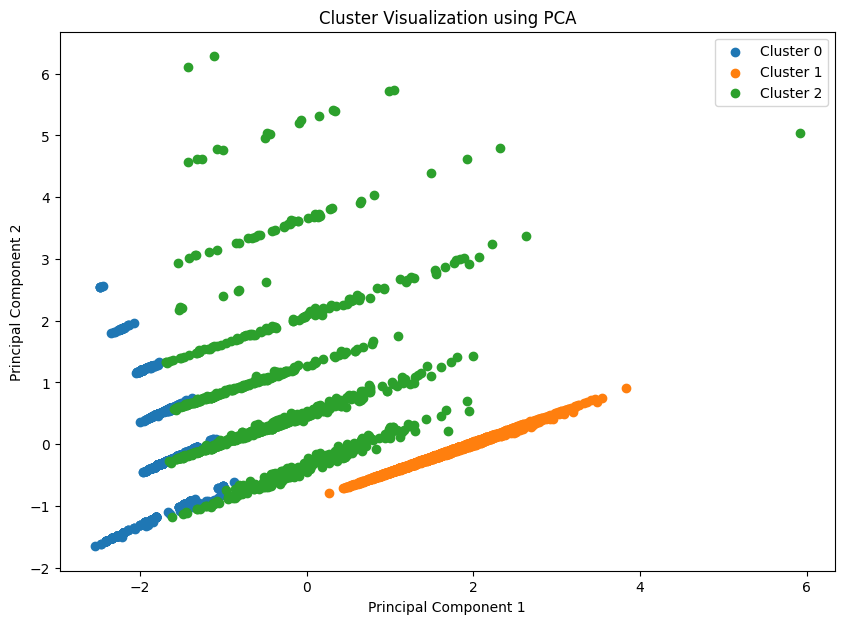

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/final_output_4.csv'  # Update this with your file's path
data = pd.read_csv(file_path)

# Handle missing values by dropping rows with missing players
data_cleaned = data.dropna(subset=['player'])

# Selecting numerical columns for clustering
numerical_cols = ['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']
numerical_data = data_cleaned[numerical_cols]

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Plot the dendrogram for a smaller subset (500 samples)
sampled_data = scaled_data[:500]
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(sampled_data, method='ward'))
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Sampled Players")
plt.ylabel("Euclidean distances")
plt.show()

# Perform Agglomerative Clustering with 3 clusters
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agg_clustering.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data_cleaned['Cluster'] = cluster_labels

# Analyze cluster characteristics
cluster_means = data_cleaned.groupby('Cluster')[numerical_cols].mean()
print("Cluster Characteristics:")
print(cluster_means)

# Use PCA to reduce data to 2D for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot the clusters in a scatter plot
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    cluster_points = pca_data[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title("Cluster Visualization using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Save the labeled dataset
data_cleaned.to_csv('clustered_data.csv', index=False)


DBSCAN CLUSTERING

Number of clusters: 11
Noise points: 127

Noise: 127 players identified as noise (outliers).

Cluster 0:
 - Size: 2966 players
 - Avg Runs Scored: 53.89
 - Avg Batting Strike Rate: 150.76
 - Avg Wickets Taken: 0.00
 - Avg Bowling Strike Rate: 0.00

Cluster 1:
 - Size: 838 players
 - Avg Runs Scored: 2.68
 - Avg Batting Strike Rate: 32.53
 - Avg Wickets Taken: 3.00
 - Avg Bowling Strike Rate: 8.04

Cluster 2:
 - Size: 1580 players
 - Avg Runs Scored: 3.44
 - Avg Batting Strike Rate: 35.07
 - Avg Wickets Taken: 2.00
 - Avg Bowling Strike Rate: 11.65

Cluster 3:
 - Size: 567 players
 - Avg Runs Scored: 12.85
 - Avg Batting Strike Rate: 50.44
 - Avg Wickets Taken: 1.00
 - Avg Bowling Strike Rate: 21.46

Cluster 4:
 - Size: 246 players
 - Avg Runs Scored: 1.68
 - Avg Batting Strike Rate: 22.16
 - Avg Wickets Taken: 4.00
 - Avg Bowling Strike Rate: 6.02

Cluster 5:
 - Size: 5 players
 - Avg Runs Scored: 0.00
 - Avg Batting Strike Rate: 0.00
 - Avg Wickets Taken: 6.00
 - Avg Bowling Strike Ra

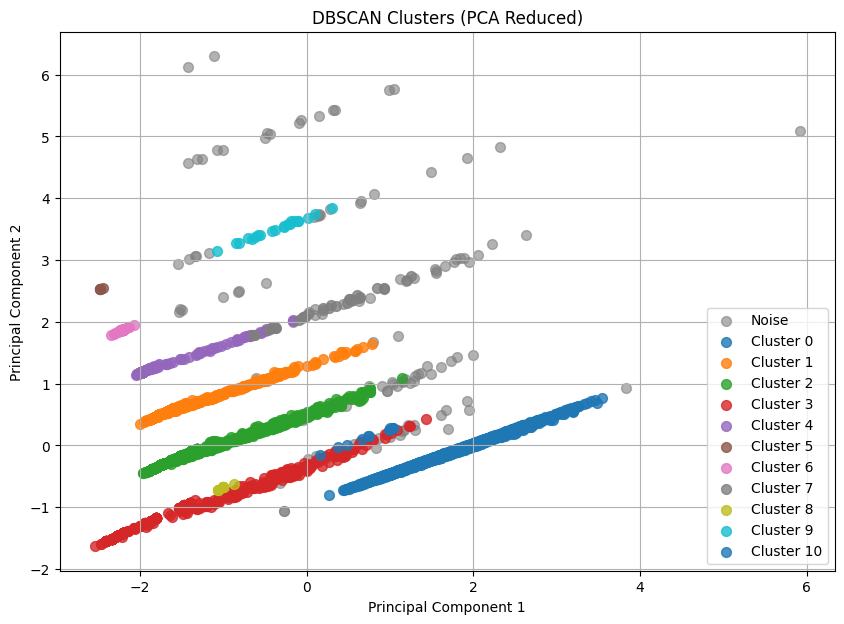

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('/content/final_output_4.csv')  # Replace with your file path
data_cleaned = data.drop(columns=['id', 'player'])

# Encode 'player_of_match' as binary labels (yes=1, no=0)
label_encoder = LabelEncoder()
data_cleaned['player_of_match'] = label_encoder.fit_transform(data_cleaned['player_of_match'])

X = data_cleaned[['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Identify unique clusters and noise points
unique_clusters = np.unique(dbscan_clusters)
n_clusters = len(unique_clusters) - (1 if -1 in dbscan_clusters else 0)  # Exclude noise cluster
print(f"Number of clusters: {n_clusters}")
print(f"Noise points: {list(dbscan_clusters).count(-1)}")

# Step 2: Analyze clusters
data_cleaned['Cluster'] = dbscan_clusters
cluster_descriptions = {}

for cluster_label in unique_clusters:
    if cluster_label == -1:
        cluster_descriptions['Noise'] = data_cleaned[data_cleaned['Cluster'] == -1].shape[0]
    else:
        cluster_data = data_cleaned[data_cleaned['Cluster'] == cluster_label]
        cluster_mean = cluster_data[['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']].mean()
        cluster_size = cluster_data.shape[0]

        # Save cluster descriptions
        cluster_descriptions[f"Cluster {cluster_label}"] = {
            "size": cluster_size,
            "mean_runs_scored": cluster_mean['runs_scored'],
            "mean_batting_strike_rate": cluster_mean['batting_strike_rate'],
            "mean_wickets_taken": cluster_mean['wickets_taken'],
            "mean_bowling_strike_rate": cluster_mean['bowling_strike_rate'],
        }

# Print cluster descriptions
for cluster, description in cluster_descriptions.items():
    if cluster == 'Noise':
        print(f"\n{cluster}: {description} players identified as noise (outliers).")
    else:
        print(f"\n{cluster}:")
        print(f" - Size: {description['size']} players")
        print(f" - Avg Runs Scored: {description['mean_runs_scored']:.2f}")
        print(f" - Avg Batting Strike Rate: {description['mean_batting_strike_rate']:.2f}")
        print(f" - Avg Wickets Taken: {description['mean_wickets_taken']:.2f}")
        print(f" - Avg Bowling Strike Rate: {description['mean_bowling_strike_rate']:.2f}")

# Step 3: Visualize clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
for cluster_label in unique_clusters:
    if cluster_label == -1:
        # Noise points
        plt.scatter(X_pca[dbscan_clusters == cluster_label, 0], X_pca[dbscan_clusters == cluster_label, 1],
                    label="Noise", color="gray", s=50, alpha=0.6)
    else:
        plt.scatter(X_pca[dbscan_clusters == cluster_label, 0], X_pca[dbscan_clusters == cluster_label, 1],
                    label=f'Cluster {cluster_label}', s=50, alpha=0.8)
plt.title('DBSCAN Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


OPTICS CLUSERING (Ordering Points To Identify the Clustering Structure)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


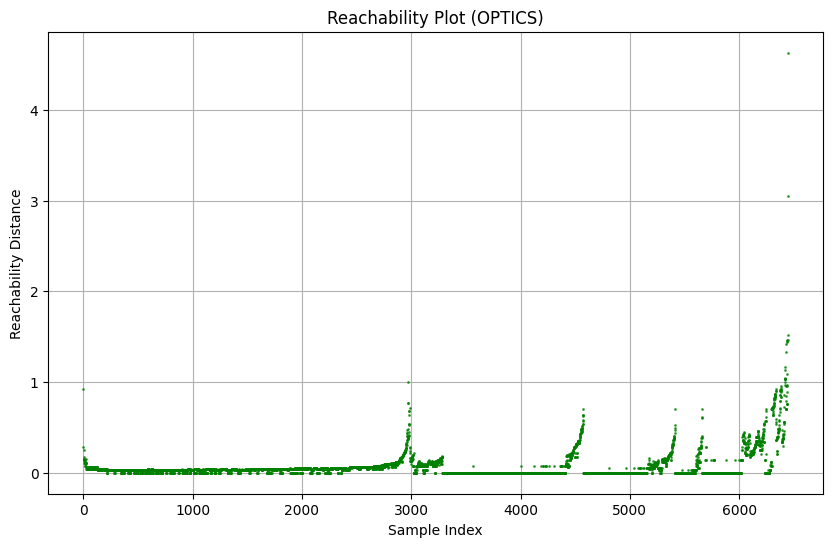

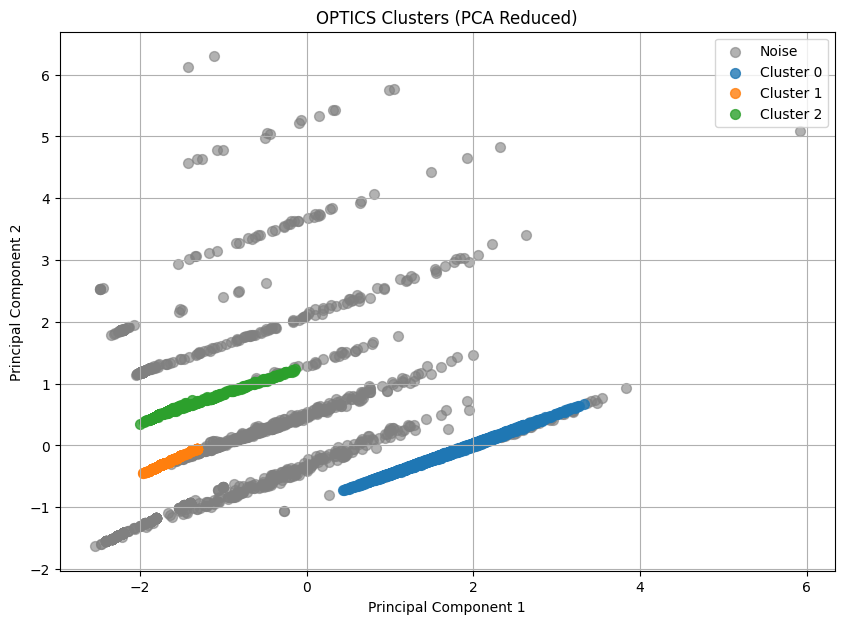


Noise: 1582 samples identified as noise.

Cluster 0:
 - Size: 2926 samples
 - Avg Runs Scored: 53.67
 - Avg Batting Strike Rate: 149.05
 - Avg Wickets Taken: 0.00
 - Avg Bowling Strike Rate: 0.00

Cluster 1:
 - Size: 1129 samples
 - Avg Runs Scored: 0.00
 - Avg Batting Strike Rate: 0.00
 - Avg Wickets Taken: 2.00
 - Avg Bowling Strike Rate: 11.85

Cluster 2:
 - Size: 810 samples
 - Avg Runs Scored: 2.06
 - Avg Batting Strike Rate: 25.87
 - Avg Wickets Taken: 3.00
 - Avg Bowling Strike Rate: 8.08


In [1]:
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
data = pd.read_csv('/content/final_output_4.csv')  # Replace with your file path
data_cleaned = data.drop(columns=['id', 'player'])

# Select relevant features for clustering
X = data_cleaned[['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 1: Apply OPTICS Clustering
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics_clusters = optics.fit_predict(X_scaled)

# Step 2: Generate Reachability Plot
reachability = optics.reachability_[optics.ordering_]
labels = optics.labels_

plt.figure(figsize=(10, 6))
plt.plot(reachability, 'g.', alpha=0.7, markersize=2)
plt.title('Reachability Plot (OPTICS)')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.grid(True)
plt.show()

# Step 3: Visualize Clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
for cluster_label in np.unique(labels):
    if cluster_label == -1:
        # Noise points
        plt.scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1],
                    label="Noise", color="gray", s=50, alpha=0.6)
    else:
        plt.scatter(X_pca[labels == cluster_label, 0], X_pca[labels == cluster_label, 1],
                    label=f'Cluster {cluster_label}', s=50, alpha=0.8)

plt.title('OPTICS Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Analyze the Clusters
data_cleaned['Cluster'] = labels
cluster_descriptions = {}

for cluster_label in np.unique(labels):
    if cluster_label == -1:
        cluster_descriptions['Noise'] = data_cleaned[data_cleaned['Cluster'] == -1].shape[0]
    else:
        cluster_data = data_cleaned[data_cleaned['Cluster'] == cluster_label]
        cluster_mean = cluster_data[['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']].mean()
        cluster_size = cluster_data.shape[0]

        # Save cluster descriptions
        cluster_descriptions[f"Cluster {cluster_label}"] = {
            "size": cluster_size,
            "mean_runs_scored": cluster_mean['runs_scored'],
            "mean_batting_strike_rate": cluster_mean['batting_strike_rate'],
            "mean_wickets_taken": cluster_mean['wickets_taken'],
            "mean_bowling_strike_rate": cluster_mean['bowling_strike_rate'],
        }

# Print Cluster Descriptions
for cluster, description in cluster_descriptions.items():
    if cluster == 'Noise':
        print(f"\n{cluster}: {description} samples identified as noise.")
    else:
        print(f"\n{cluster}:")
        print(f" - Size: {description['size']} samples")
        print(f" - Avg Runs Scored: {description['mean_runs_scored']:.2f}")
        print(f" - Avg Batting Strike Rate: {description['mean_batting_strike_rate']:.2f}")
        print(f" - Avg Wickets Taken: {description['mean_wickets_taken']:.2f}")
        print(f" - Avg Bowling Strike Rate: {description['mean_bowling_strike_rate']:.2f}")


BIG DATA ANALYSIS

FP GROWTH USING PYSPARK

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth
from pyspark.sql.functions import array, col, when
import time

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("FP-Growth for IPL Dataset") \
    .getOrCreate()

# Load dataset
file_path = "/content/matches.csv"  # Replace with the correct path
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Count total games per team across both team1 and team2
team_counts = data.select("team1").union(data.select("team2")) \
    .groupBy("team1").count().withColumnRenamed("count", "total_games")
teams_over_30_games = team_counts.filter(col("total_games") > 30)

# Count wins for each team where toss winner is also the match winner
data_win = data.filter(col("toss_winner") == col("winner"))
win_counts = data_win.groupBy("winner").count()
teams_over_30_wins = win_counts.filter(col("count") > 30)

# Calculate minimum support for FP-Growth
total_games_won = win_counts.agg({"count": "sum"}).collect()[0][0]
min_support = 30 / total_games_won
print(f"Minimum Support (for teams with over 30 wins): {min_support:.4f}")

# Encode toss decisions into boolean format
data = data.withColumn("toss_decision_bat", when(col("toss_decision") == "bat", True).otherwise(False))
data = data.withColumn("toss_decision_field", when(col("toss_decision") == "field", True).otherwise(False))

# Create a basket format as an array for FP-Growth analysis
basket_data = data.withColumn(
    "items",
    array(
        col("toss_winner"),
        when(col("toss_decision_bat"), "bat").otherwise("field")
    )
).select("items")

# Filter basket data for teams with over 30 wins
valid_teams = [row["winner"] for row in teams_over_30_wins.collect()]
filtered_basket = basket_data.filter(
    col("items")[0].isin(*valid_teams)
)

# Apply FP-Growth
start_time = time.time()
fp_growth = FPGrowth(itemsCol="items", minSupport=min_support, minConfidence=0.5)
fp_model = fp_growth.fit(filtered_basket)
end_time = time.time()
fpgrowth_time = end_time - start_time
print(f"\nTime taken to generate frequent itemsets: {fpgrowth_time:.4f} seconds")

# Display frequent itemsets
print("\nFrequent Itemsets (for teams with over 30 wins):")
fp_model.freqItemsets.show(truncate=False)

# Generate association rules
start_time = time.time()
association_rules = fp_model.associationRules
end_time = time.time()
association_rules_time = end_time - start_time
print(f"\nTime taken to generate association rules: {association_rules_time:.4f} seconds")
print("\nAssociation Rules:")
association_rules.show(truncate=False)

# Stop SparkSession
spark.stop()


Minimum Support (for teams with over 30 wins): 0.0542

Time taken to generate frequent itemsets: 1.0998 seconds

Frequent Itemsets (for teams with over 30 wins):
+------------------------------------+----+
|items                               |freq|
+------------------------------------+----+
|[Kings XI Punjab]                   |85  |
|[Kings XI Punjab, field]            |58  |
|[Mumbai Indians]                    |143 |
|[Mumbai Indians, bat]               |53  |
|[Mumbai Indians, field]             |90  |
|[Rajasthan Royals]                  |120 |
|[Rajasthan Royals, field]           |76  |
|[Chennai Super Kings]               |122 |
|[Chennai Super Kings, bat]          |59  |
|[Chennai Super Kings, field]        |63  |
|[Sunrisers Hyderabad]               |88  |
|[Sunrisers Hyderabad, field]        |53  |
|[bat]                               |318 |
|[Delhi Daredevils]                  |80  |
|[Delhi Daredevils, field]           |51  |
|[Kolkata Knight Riders]             |122 |
|[

DECISION TREE CLASSFICATION USING PYSPARK

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Decision Tree on IPL Dataset") \
    .getOrCreate()

# Load the dataset
file_path = "/content/final_output_4.csv"  # Replace with your dataset path
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Display dataset schema
data.printSchema()

# Display top few rows of the dataset
print("Sample rows from the dataset:")
data.show(5, truncate=False)

# Preprocess data: fill missing values and encode target column
data = data.fillna({'player_of_match': 'no'})
data = data.withColumn(
    "player_of_match", when(col("player_of_match") == "yes", 1).otherwise(0)
)

# Define features and target column
features = ['runs_scored', 'batting_strike_rate', 'wickets_taken', 'bowling_strike_rate']
assembler = VectorAssembler(inputCols=features, outputCol="features")
data = assembler.transform(data).select("features", "player_of_match")

# Check for null values
data = data.dropna()
print(f"Dataset count after dropping nulls: {data.count()}")

# Split data into training (80%) and testing (20%) sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Check if train_data is empty
if train_data.count() == 0:
    raise ValueError("Training data is empty. Check your preprocessing steps or input data.")

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(
    labelCol="player_of_match",
    featuresCol="features",
    maxDepth=5,
    minInstancesPerNode=10
)

# Train the model
dt_model = dt.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Display a few rows of the predictions
print("Sample predictions:")
predictions.select("features", "player_of_match", "prediction").show(truncate=False, n=10) #increase the n value to check the whole predictions

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(
    labelCol="player_of_match", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator.evaluate(predictions)

# Print Accuracy
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree model structure
print("\nDecision Tree Model Structure:")
print(dt_model.toDebugString)

# Stop SparkSession
spark.stop()


root
 |-- id: integer (nullable = true)
 |-- player: string (nullable = true)
 |-- runs_scored: integer (nullable = true)
 |-- batting_strike_rate: double (nullable = true)
 |-- wickets_taken: double (nullable = true)
 |-- bowling_strike_rate: double (nullable = true)
 |-- player_of_match: string (nullable = true)

Sample rows from the dataset:
+------+-----------+-----------+-------------------+-------------+-------------------+---------------+
|id    |player     |runs_scored|batting_strike_rate|wickets_taken|bowling_strike_rate|player_of_match|
+------+-----------+-----------+-------------------+-------------+-------------------+---------------+
|335982|BB McCullum|158        |216.4383561643836  |0.0          |0.0                |yes            |
|335982|RT Ponting |20         |100.0              |0.0          |0.0                |no             |
|335982|P Kumar    |18         |120.0              |0.0          |0.0                |no             |
|335982|AB Agarkar |0          |0.0

DBSCAN CLUSTERING USING PYSPARK

Cleaning and preprocessing dataset...
+-----------+-------------------+-------------+-------------------+---------------+--------------------+
|runs_scored|batting_strike_rate|wickets_taken|bowling_strike_rate|player_of_match|            features|
+-----------+-------------------+-------------+-------------------+---------------+--------------------+
|        158|  216.4383561643836|          0.0|                0.0|            yes|[158.0,216.438356...|
|         20|              100.0|          0.0|                0.0|             no|[20.0,100.0,0.0,0.0]|
|         18|              120.0|          0.0|                0.0|             no|[18.0,120.0,0.0,0.0]|
|          0|                0.0|          3.0|  9.333333333333334|             no|[0.0,0.0,3.0,9.33...|
|         10|  83.33333333333334|          3.0|  8.333333333333334|             no|[10.0,83.33333333...|
+-----------+-------------------+-------------+-------------------+---------------+--------------------+
only showing top 

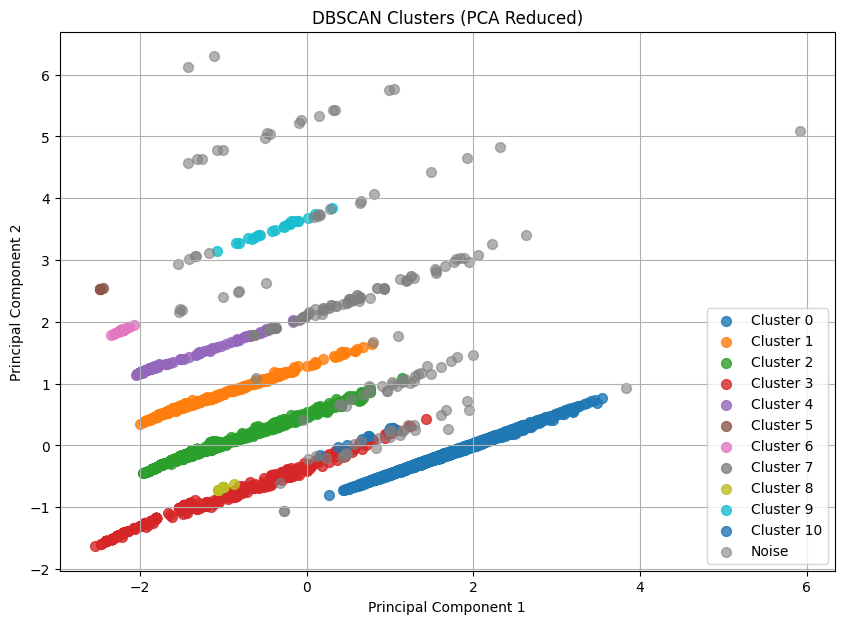


Clustering completed and visualization displayed.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler as SklearnScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Big Data Clustering with DBSCAN") \
    .getOrCreate()

# Load the dataset
data = spark.read.csv("/content/final_output_4.csv", header=True, inferSchema=True)

# Data cleaning and preprocessing
print("Cleaning and preprocessing dataset...")
data_cleaned = data.drop("id", "player")  # Drop unnecessary columns

# Assemble features
assembler = VectorAssembler(inputCols=["runs_scored", "batting_strike_rate", "wickets_taken", "bowling_strike_rate"], outputCol="features")
data_transformed = assembler.transform(data_cleaned)
data_transformed.show(5)

# Convert to Pandas DataFrame for use with sklearn DBSCAN
pandas_df = data_transformed.select("runs_scored", "batting_strike_rate", "wickets_taken", "bowling_strike_rate").toPandas()

# Standardize the data using sklearn
print("Standardizing data...")
scaler = SklearnScaler()
X_scaled = scaler.fit_transform(pandas_df)

# Step 1: Apply DBSCAN clustering
print("\nApplying DBSCAN clustering...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

# Step 2: Add the cluster labels back to the original dataframe
pandas_df["Cluster"] = dbscan_clusters

# Step 3: Print cluster descriptions
print("\nCluster Descriptions:")
for cluster_label in set(dbscan_clusters):
    cluster_data = pandas_df[pandas_df["Cluster"] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(f" - Size: {cluster_data.shape[0]} players")
    print(f" - Avg Runs Scored: {cluster_data['runs_scored'].mean():.2f}")
    print(f" - Avg Batting Strike Rate: {cluster_data['batting_strike_rate'].mean():.2f}")
    print(f" - Avg Wickets Taken: {cluster_data['wickets_taken'].mean():.2f}")
    print(f" - Avg Bowling Strike Rate: {cluster_data['bowling_strike_rate'].mean():.2f}")

# Step 4: Visualize clusters with PCA
from sklearn.decomposition import PCA

print("\nVisualizing clusters using PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
for cluster_label in set(dbscan_clusters):
    if cluster_label == -1:
        # Noise points
        plt.scatter(X_pca[dbscan_clusters == cluster_label, 0], X_pca[dbscan_clusters == cluster_label, 1],
                    label="Noise", color="gray", s=50, alpha=0.6)
    else:
        plt.scatter(X_pca[dbscan_clusters == cluster_label, 0], X_pca[dbscan_clusters == cluster_label, 1],
                    label=f'Cluster {cluster_label}', s=50, alpha=0.8)

plt.title('DBSCAN Clusters (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Stop the Spark session
spark.stop()

print("\nClustering completed and visualization displayed.")
